In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## BROADCAST VARIATING SIZE

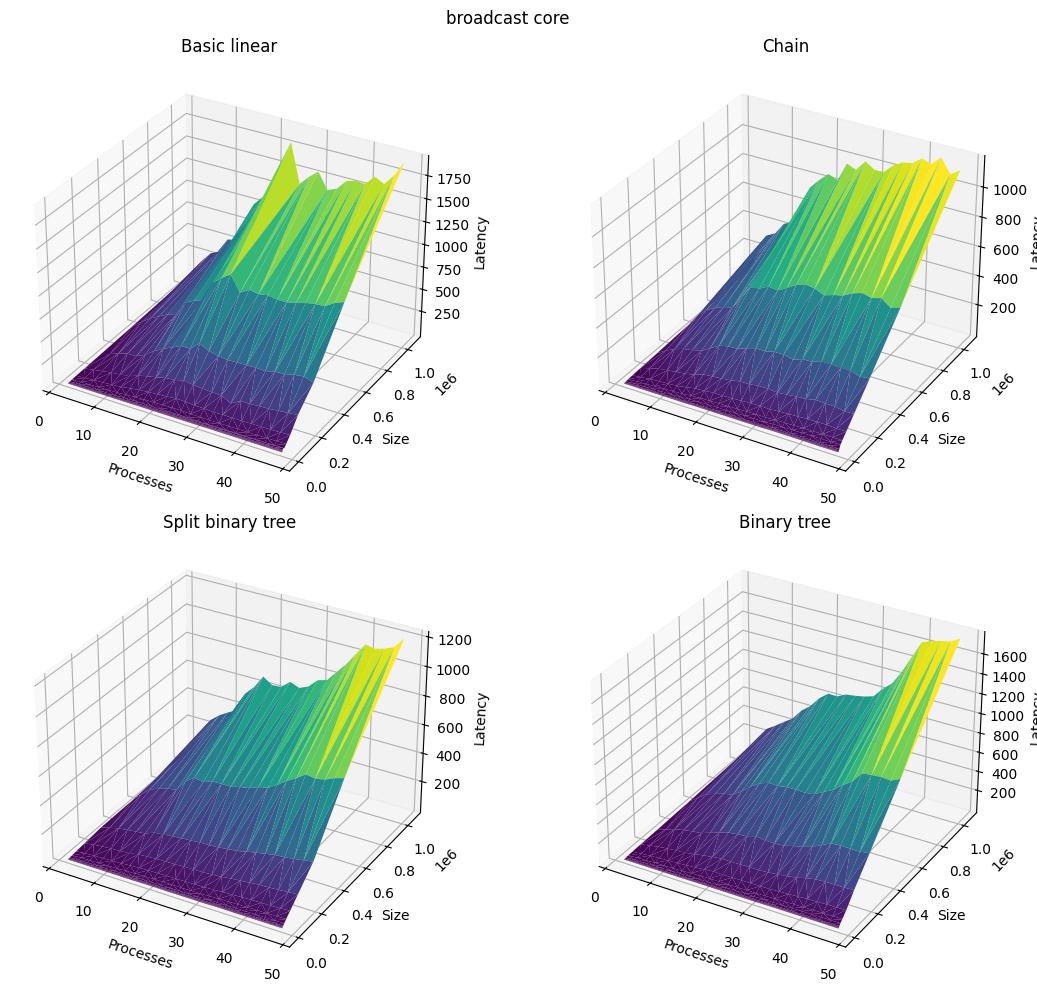

In [7]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_core_thin.csv",
]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')
axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Chain')
axs[1,0].set_title('Split binary tree')
axs[1,1].set_title('Binary tree')

fig.suptitle('broadcast core')
#plt.title('bcast core')
# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/1619465466.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     6929.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:00:26   Log-Likelihood:                -2543.9
No. Observations:                 480   AIC:                             5096.
Df Residuals:                     476   BIC:                             5113.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.4149      9.143     -0.373

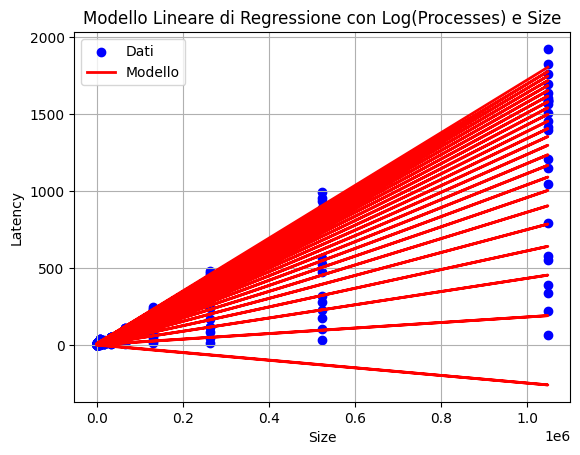

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_core_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


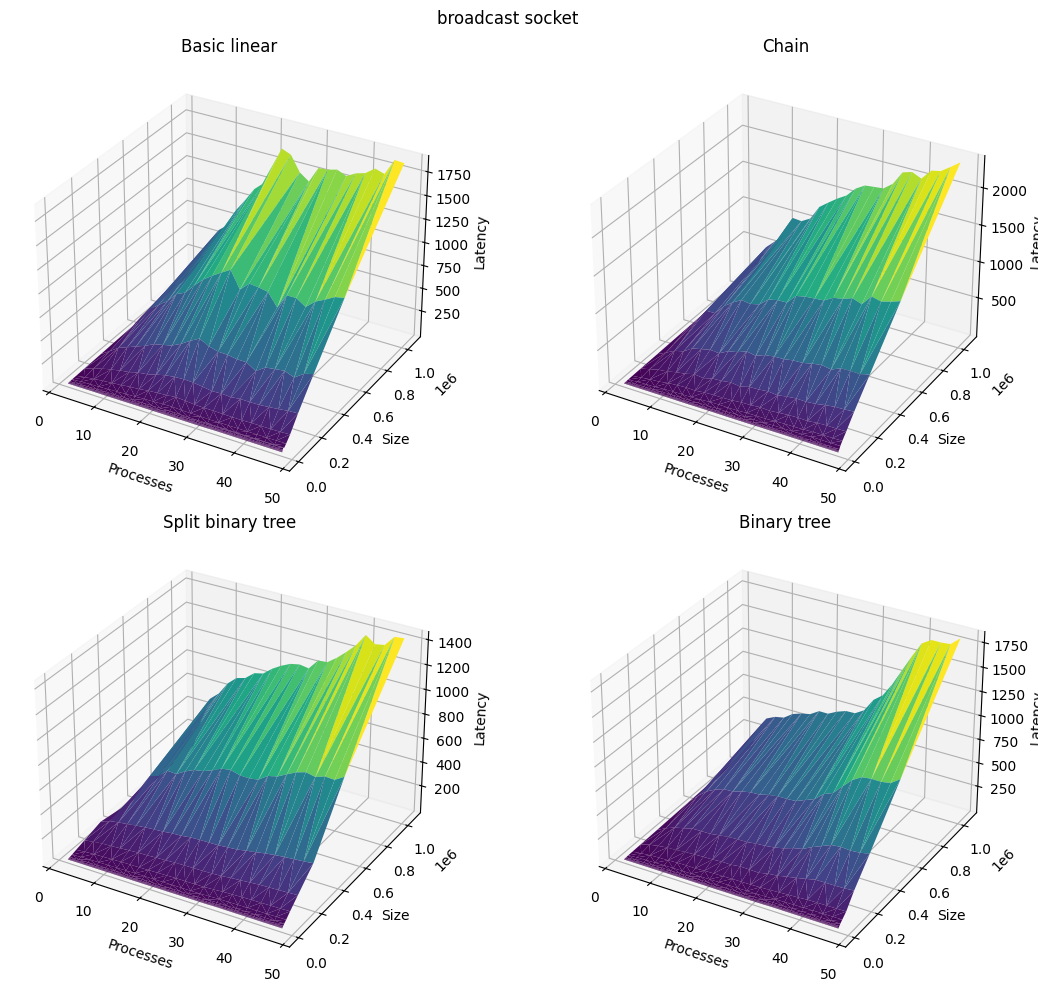

In [89]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_socket_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Chain')
axs[1,0].set_title('Split binary tree')
axs[1,1].set_title('Binary tree')

fig.suptitle('broadcast socket')

# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/3125114962.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.321e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:00:42   Log-Likelihood:                -2416.3
No. Observations:                 480   AIC:                             4841.
Df Residuals:                     476   BIC:                             4857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1454      7.008     -0.021

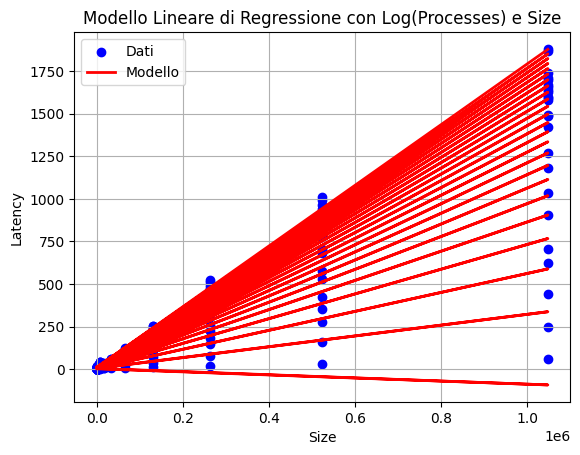

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_socket_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


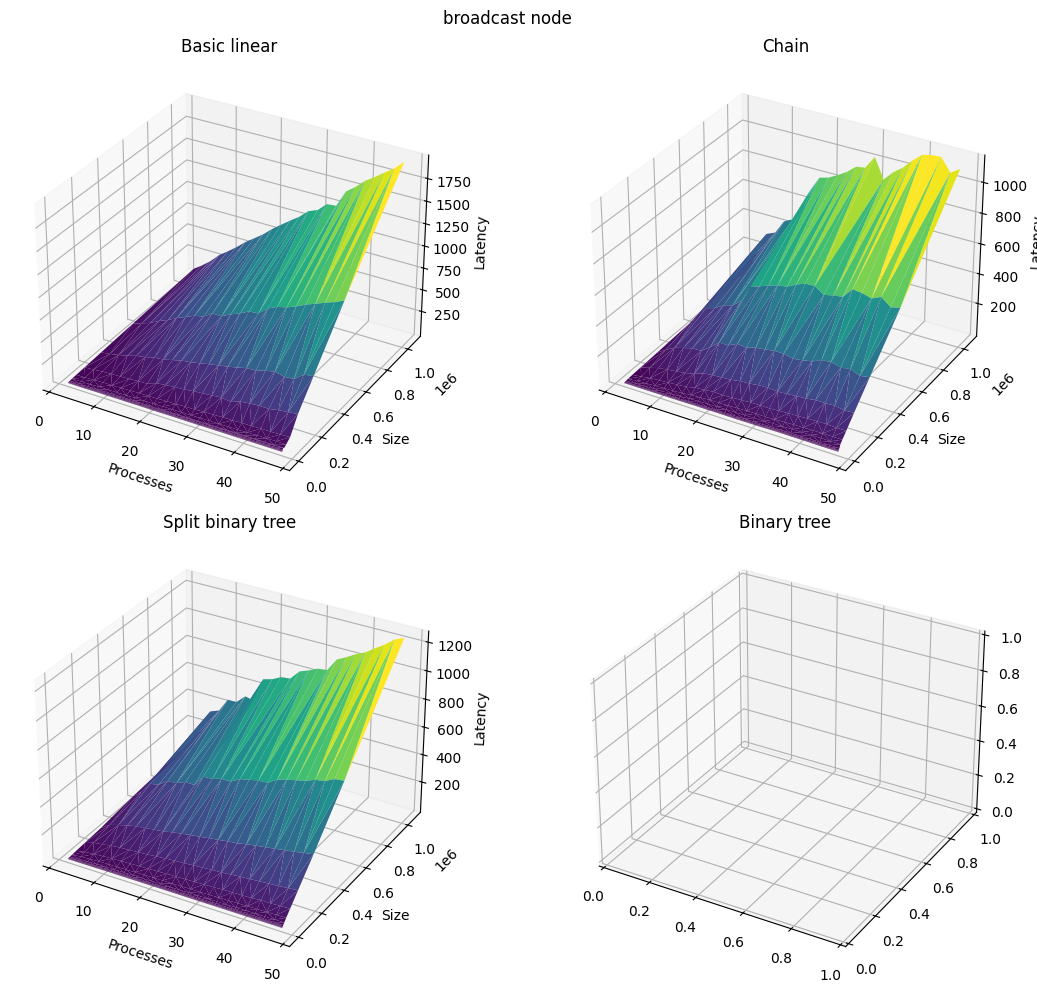

In [16]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_node_thin.csv",
   # "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_node_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Basic linear')
axs[0,1].set_title('Chain')
axs[1,0].set_title('Split binary tree')
axs[1,1].set_title('Binary tree')

fig.suptitle('broadcast node')

# Mostra la figura
plt.tight_layout()
plt.show()


In [ ]:
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_core_thin.csv",

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_socket_thin.csv",

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_node_thin.csv",


]

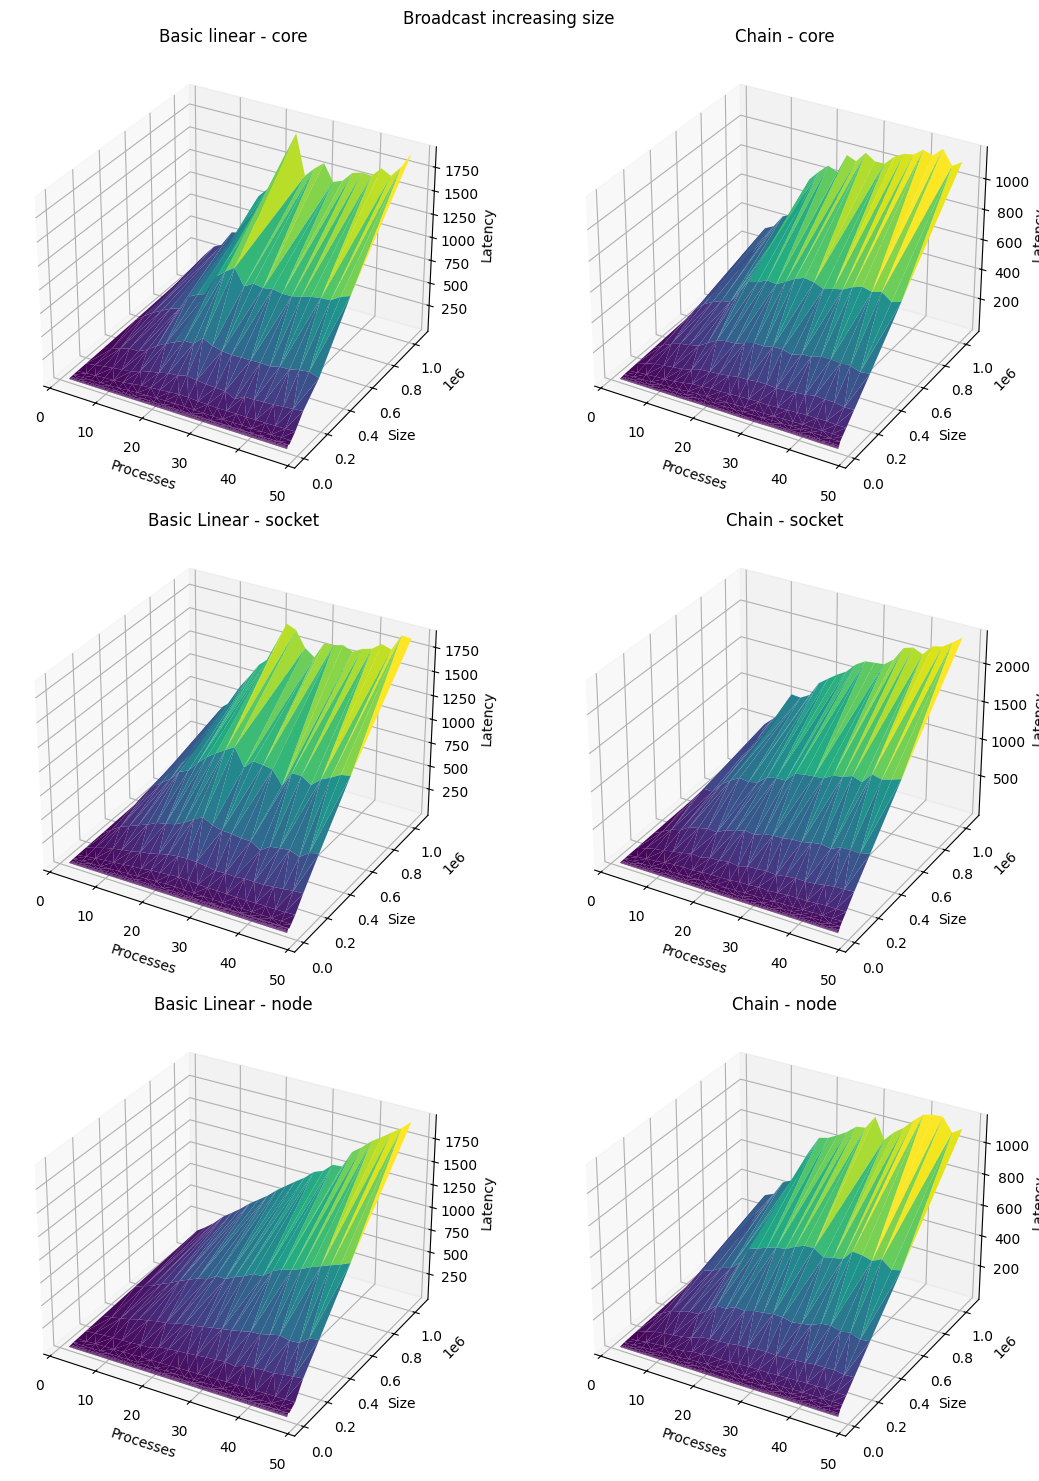

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_core_thin.csv",

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_socket_thin.csv",

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_node_thin.csv",


]
# Crea una figura con 3 righe e 2 colonne di grafici
fig, axs = plt.subplots(3, 2, figsize=(12, 15), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Basic linear - core')
axs[0,1].set_title('Chain - core')
axs[1,0].set_title('Basic Linear - socket')
axs[1,1].set_title('Chain - socket')
axs[2,0].set_title('Basic Linear - node')
axs[2,1].set_title('Chain - node')

fig.suptitle('Broadcast increasing size')

# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/3374493932.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     3888.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:59:42   Log-Likelihood:                -2615.3
No. Observations:                 480   AIC:                             5239.
Df Residuals:                     476   BIC:                             5255.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9060     10.609      0.085

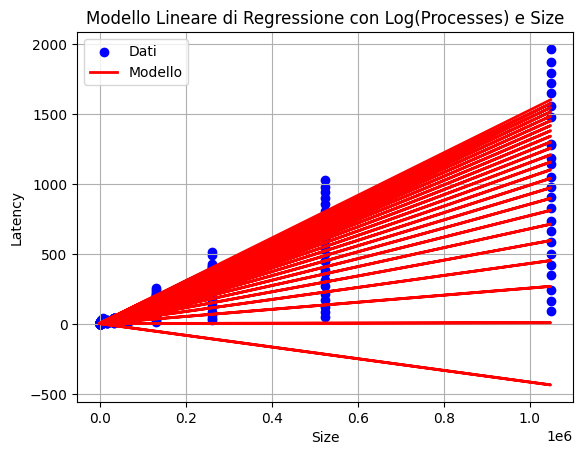

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_node_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


## SCATTER VARIATING SIZE

/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


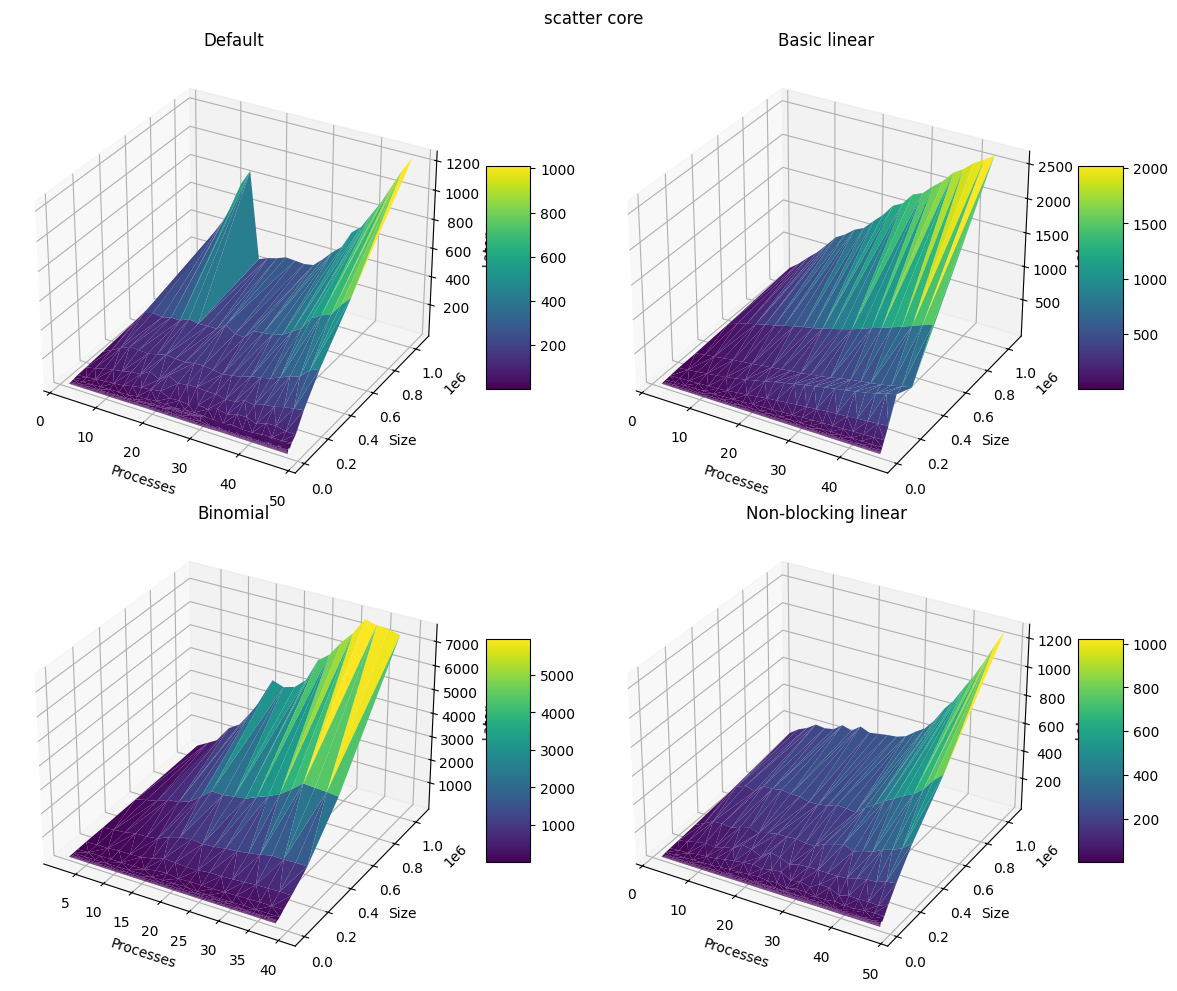

In [112]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Default')
axs[0,1].set_title('Basic linear')
axs[1,0].set_title('Binomial')
axs[1,1].set_title('Non-blocking linear')

fig.suptitle('scatter core')

# Mostra la figura
plt.tight_layout()
plt.show()


/var/folders/72/24j7jy9s6sb2xm_dc84kdhm00000gn/T/ipykernel_98205/1959536101.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Log_Processes'] = np.log2(data['Processes'])


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1939.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.29e-258
Time:                        23:08:05   Log-Likelihood:                -2748.7
No. Observations:                 458   AIC:                             5505.
Df Residuals:                     454   BIC:                             5522.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -16.9215     18.719     -0.904

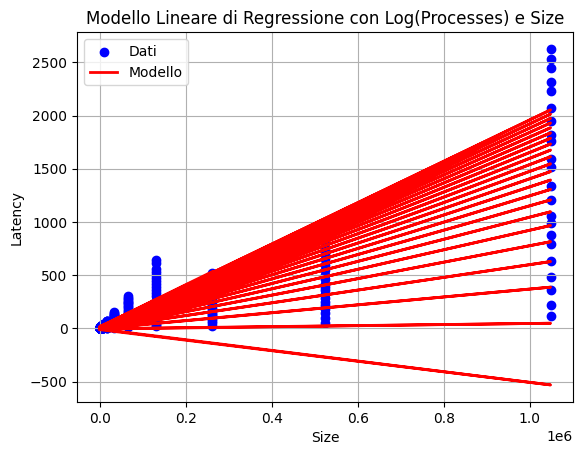

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Size']]
y = data['Latency']

# Calcola il logaritmo in base due dei processi
X['Log_Processes'] = np.log2(data['Processes'])

X['Interaction'] = X['Log_Processes'] * X['Size']
# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


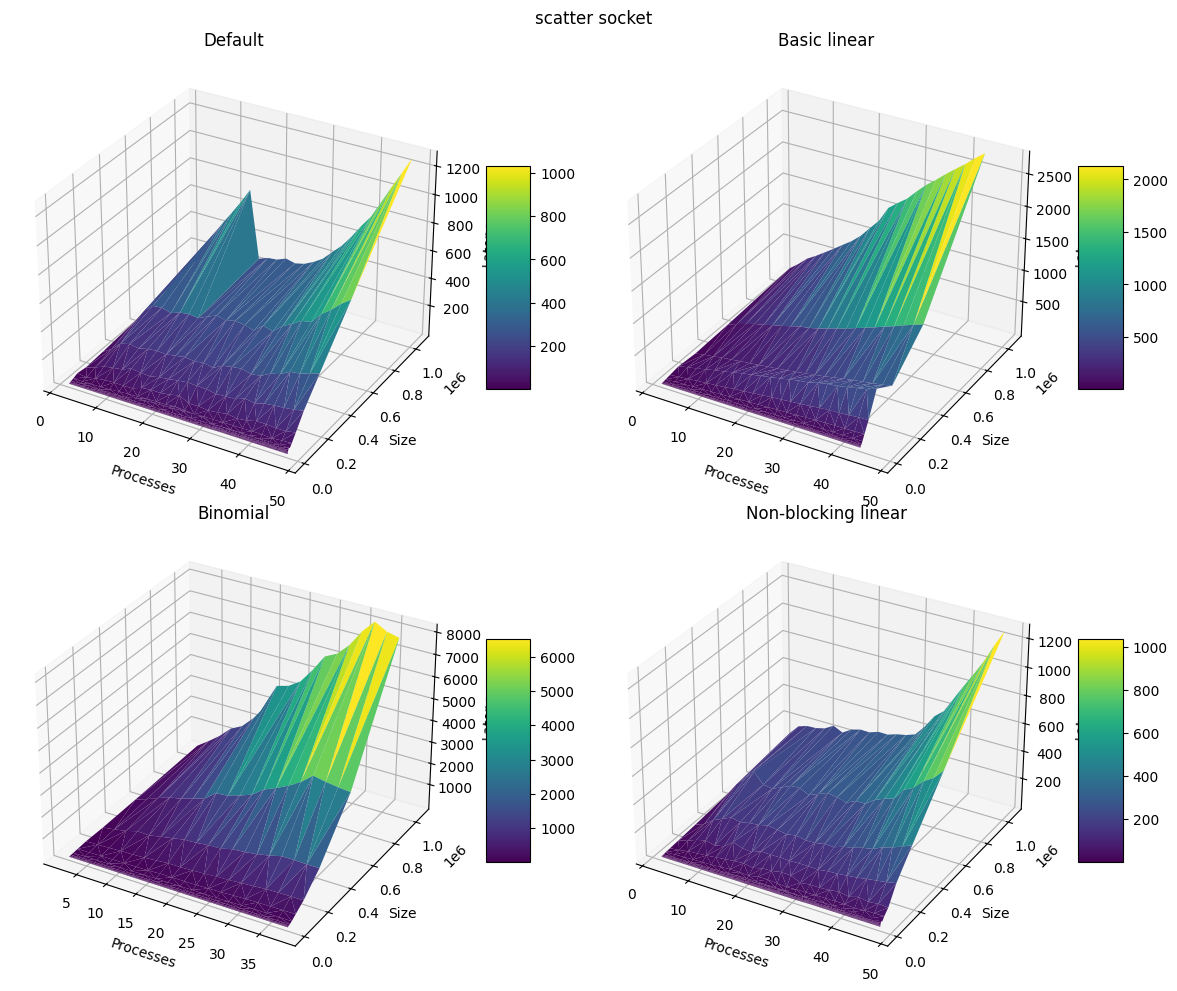

In [113]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Default')
axs[0,1].set_title('Basic linear')
axs[1,0].set_title('Binomial')
axs[1,1].set_title('Non-blocking linear')

fig.suptitle('scatter socket')

# Mostra la figura
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1493.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          7.43e-229
Time:                        23:21:16   Log-Likelihood:                -2706.9
No. Observations:                 440   AIC:                             5422.
Df Residuals:                     436   BIC:                             5438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9909     22.089     -0.090

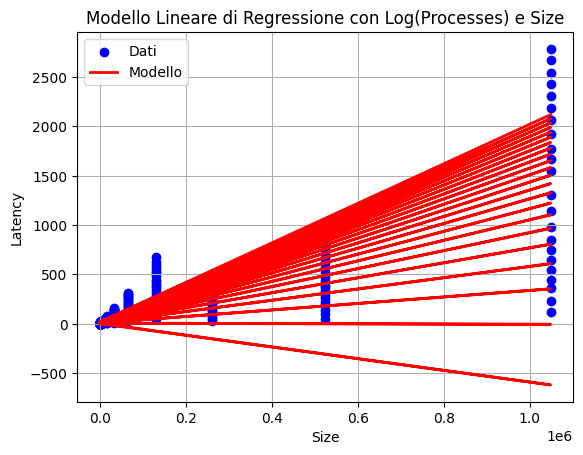

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin.csv")

# Limita il DataFrame alle prime 441 righe
data = data.iloc[:440]

# Calcola il logaritmo in base due dei processi
log_processes = np.log2(data['Processes'])

# Calcola l'interazione tra il logaritmo dei processi e la dimensione
interaction = log_processes * data['Size']

# Crea un nuovo DataFrame per le covariate
X = pd.DataFrame({'Size': data['Size'], 'Log_Processes': log_processes, 'Interaction': interaction})

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Seleziona la variabile dipendente
y = data['Latency']

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


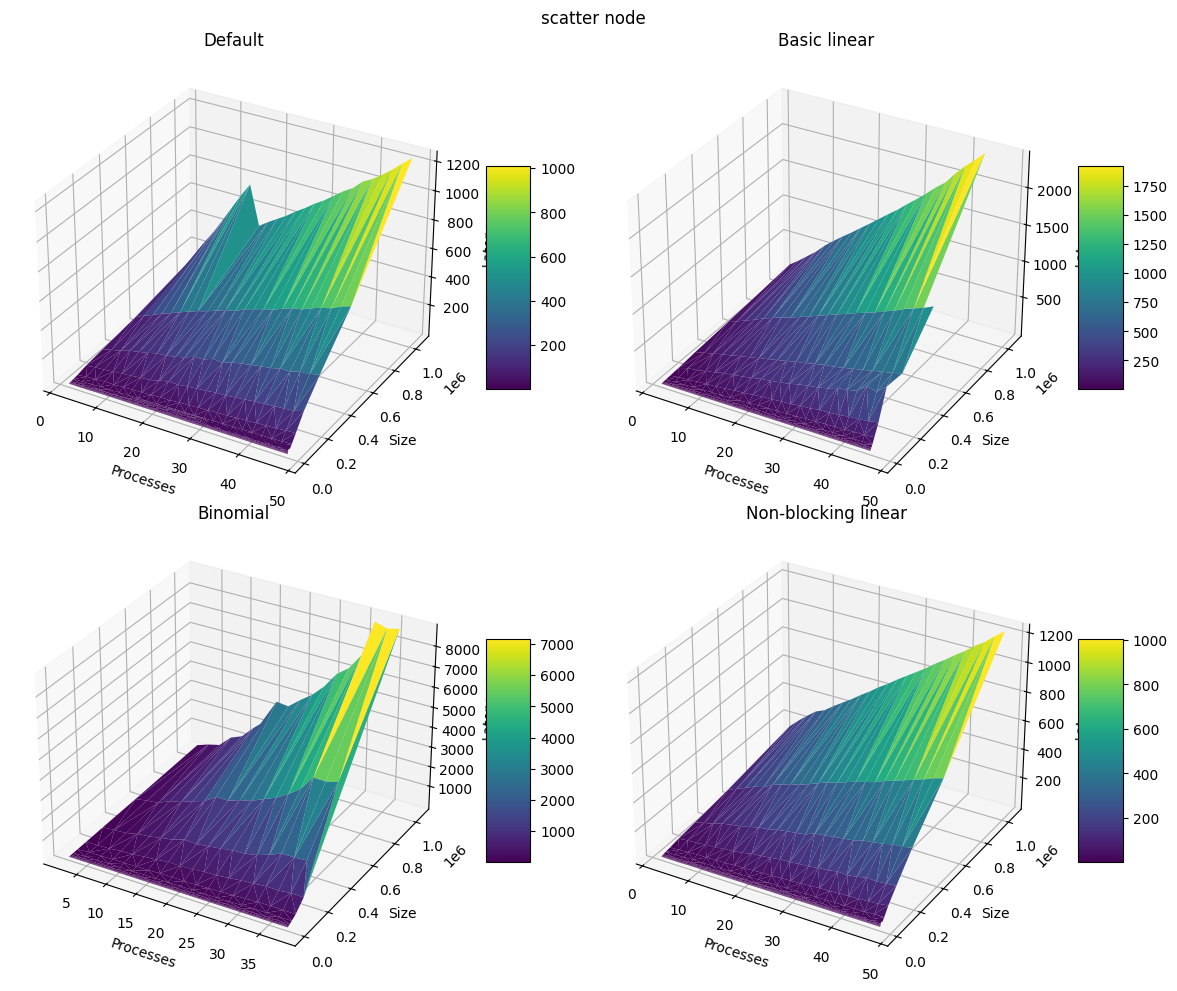

In [33]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Default')
axs[0,1].set_title('Basic linear')
axs[1,0].set_title('Binomial')
axs[1,1].set_title('Non-blocking linear')

fig.suptitle('scatter node')

# Mostra la figura
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2747.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          5.15e-291
Time:                        23:28:12   Log-Likelihood:                -2649.1
No. Observations:                 459   AIC:                             5306.
Df Residuals:                     455   BIC:                             5323.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.8774     14.871     -0.866

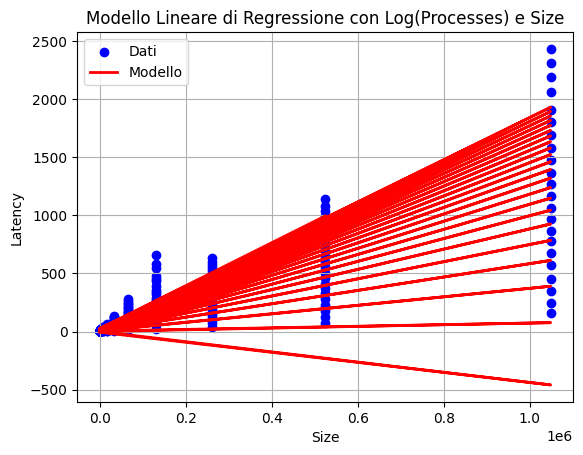

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv")

# Limita il DataFrame alle prime 441 righe
data = data.iloc[:459]

# Calcola il logaritmo in base due dei processi
log_processes = np.log2(data['Processes'])

# Calcola l'interazione tra il logaritmo dei processi e la dimensione
interaction = log_processes * data['Size']

# Crea un nuovo DataFrame per le covariate
X = pd.DataFrame({'Size': data['Size'], 'Log_Processes': log_processes, 'Interaction': interaction})

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Seleziona la variabile dipendente
y = data['Latency']

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Size'], y, color='blue', label='Dati')
plt.plot(data['Size'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Size')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Log(Processes) e Size')
plt.legend()
plt.grid(True)
plt.show()


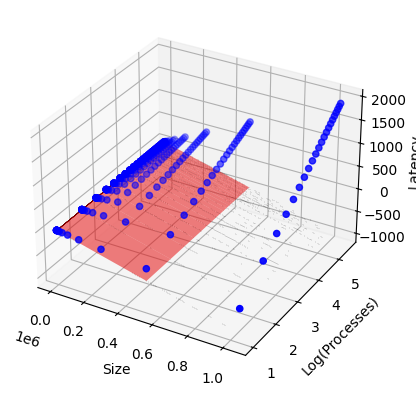

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv")

# Limita il DataFrame alle prime 441 righe
data = data.iloc[:459]

# Calcola il logaritmo in base due dei processi
log_processes = np.log2(data['Processes'])

# Calcola l'interazione tra il logaritmo dei processi e la dimensione
interaction = log_processes * data['Size']

# Crea un nuovo DataFrame per le covariate
X = pd.DataFrame({'Size': data['Size'], 'Log_Processes': log_processes, 'Interaction': interaction})

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Seleziona la variabile dipendente
y = data['Latency']

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plot tridimensionale
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dati per l'asse x, y e z
x = data['Size']
y = log_processes
z = y_pred

# Plotta i punti
ax.scatter(x, y, z, c='b', marker='o', label='Dati')

# Costruisci il piano del modello
xx, yy = np.meshgrid(x, y)
zz = results.params['const'] + results.params['Size'] * xx + results.params['Log_Processes'] * yy

# Plotta il piano del modello
ax.plot_surface(xx, yy, zz, alpha=0.5, color='r')

# Etichette degli assi
ax.set_xlabel('Size')
ax.set_ylabel('Log(Processes)')
ax.set_zlabel('Latency')

# Mostra il grafico
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     6253.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        22:51:48   Log-Likelihood:                -121.41
No. Observations:                 459   AIC:                             250.8
Df Residuals:                     455   BIC:                             267.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0245      0.056  

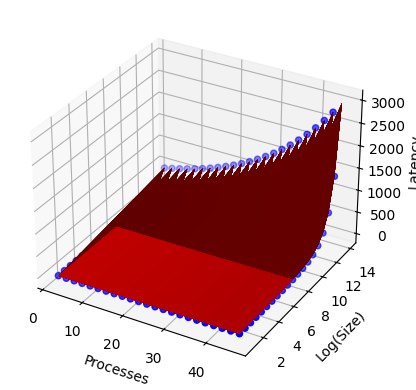

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv")

# Limita il DataFrame alle prime 441 righe
data = data.iloc[:459]

# Calcola il logaritmo in base due dei processi
log_processes = np.log2(data['Processes'])

# Calcola il logaritmo della dimensione
log_size = np.log(data['Size'])

# Calcola il quadrato del logaritmo della dimensione
log_size_squared = log_size ** 2

# Crea un nuovo DataFrame per le covariate
X = pd.DataFrame({'Processes': data['Processes'], 'Log_Size': log_size, 'Log_Size_Squared': log_size_squared})

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Seleziona la variabile dipendente
y = np.log(data['Latency'])  # Prendi il logaritmo della variabile dipendente

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dati per l'asse x, y e z
x = data['Processes']
y = log_size
z = y_pred

# Plotta i punti
ax.scatter(x, y, np.exp(z), c='b', marker='o', label='Dati')

# Costruisci il piano del modello
xx, yy = np.meshgrid(x, y)
zz = results.params['const'] + results.params['Processes'] * xx + results.params['Log_Size'] * yy + results.params['Log_Size_Squared'] * yy**2

# Plotta il piano del modello
ax.plot_surface(xx, yy, np.exp(zz), alpha=0.5, color='r')

# Etichette degli assi
ax.set_xlabel('Processes')
ax.set_ylabel('Log(Size)')
ax.set_zlabel('Latency')

# Mostra il grafico
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     6253.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        23:09:26   Log-Likelihood:                -121.41
No. Observations:                 459   AIC:                             250.8
Df Residuals:                     455   BIC:                             267.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0245      0.056  

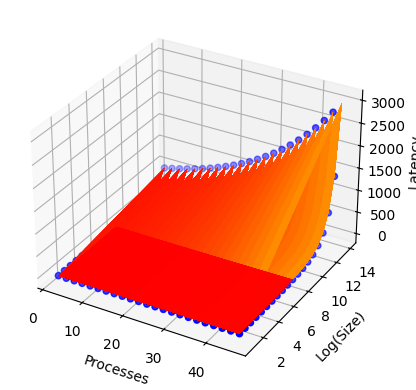

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv")

# Limita il DataFrame alle prime 441 righe
data = data.iloc[:459]

# Calcola il logaritmo in base due dei processi
log_processes = np.log2(data['Processes'])

# Calcola il logaritmo della dimensione
log_size = np.log(data['Size'])

# Calcola il quadrato del logaritmo della dimensione
log_size_squared = log_size ** 2

# Crea un nuovo DataFrame per le covariate
X = pd.DataFrame({'Processes': data['Processes'], 'Log_Size': log_size, 'Log_Size_Squared': log_size_squared})

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Seleziona la variabile dipendente
y = np.log(data['Latency'])  # Prendi il logaritmo della variabile dipendente

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dati per l'asse x, y e z
x = data['Processes']
y = log_size
z = y_pred

# Plotta i punti
ax.scatter(x, y, np.exp(z), c='b', marker='o', label='Dati')

# Costruisci il piano del modello
xx, yy = np.meshgrid(x, y)
zz = results.params['const'] + results.params['Processes'] * xx + results.params['Log_Size'] * yy + results.params['Log_Size_Squared'] * yy**2

# Plotta il piano del modello con colormap
surf = ax.plot_surface(xx, yy, np.exp(zz), cmap='autumn', alpha=0.5)

# Etichette degli assi
ax.set_xlabel('Processes')
ax.set_ylabel('Log(Size)')
ax.set_zlabel('Latency')

# Aggiungi una barra dei colori
#fig.colorbar(surf, shrink=0.5, aspect=5)

# Mostra il grafico
plt.show()


/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/Users/edoardozappia/Library/Python/3.9/lib/python/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


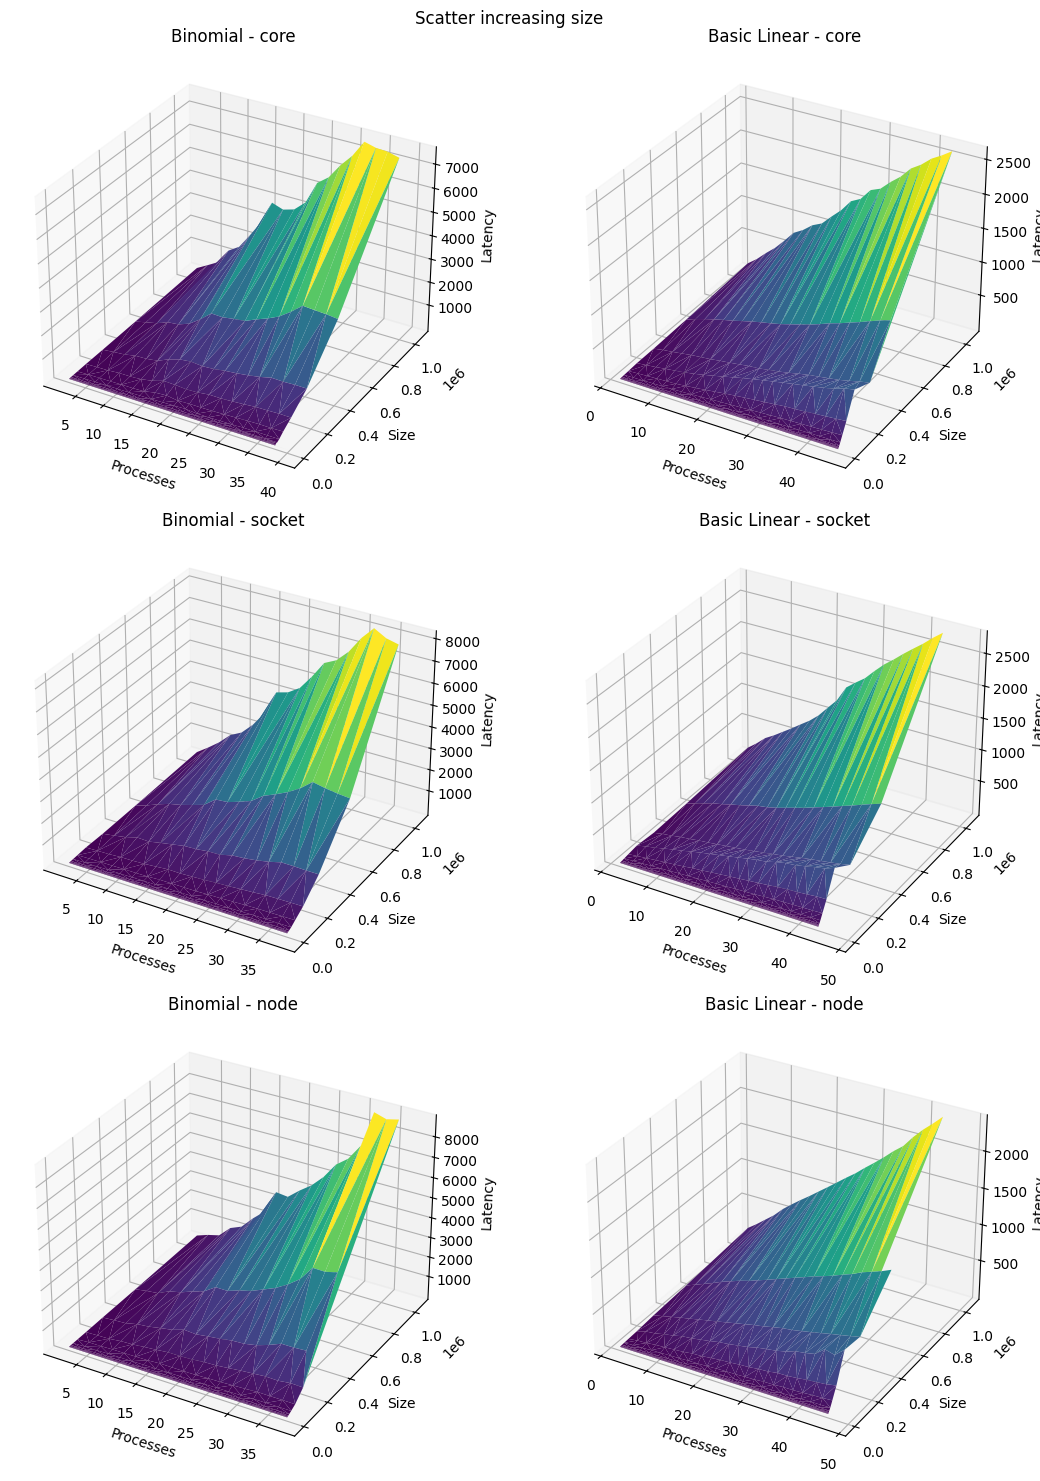

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin.csv",
  
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin.csv",
 
    
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin.csv",


]
# Crea una figura con 3 righe e 2 colonne di grafici
fig, axs = plt.subplots(3, 2, figsize=(12, 15), subplot_kw={'projection': '3d'})

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Size"]
    z = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    surf = axs[row_index, col_index].plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
    #fig.colorbar(surf, ax=axs[row_index, col_index], shrink=0.5, aspect=5)
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Size')
    axs[row_index, col_index].set_zlabel('Latency')
    #axs[row_index, col_index].set_title(f'Subplot {i+1} - {file_path.split("/")[-1]}')

axs[0,0].set_title('Binomial - core')
axs[0,1].set_title('Basic Linear - core')
axs[1,0].set_title('Binomial - socket')
axs[1,1].set_title('Basic Linear - socket')
axs[2,0].set_title('Binomial - node')
axs[2,1].set_title('Basic Linear - node')

fig.suptitle('Scatter increasing size')

# Mostra la figura
plt.tight_layout()
plt.show()


## BROADCAST FIXED SIZE

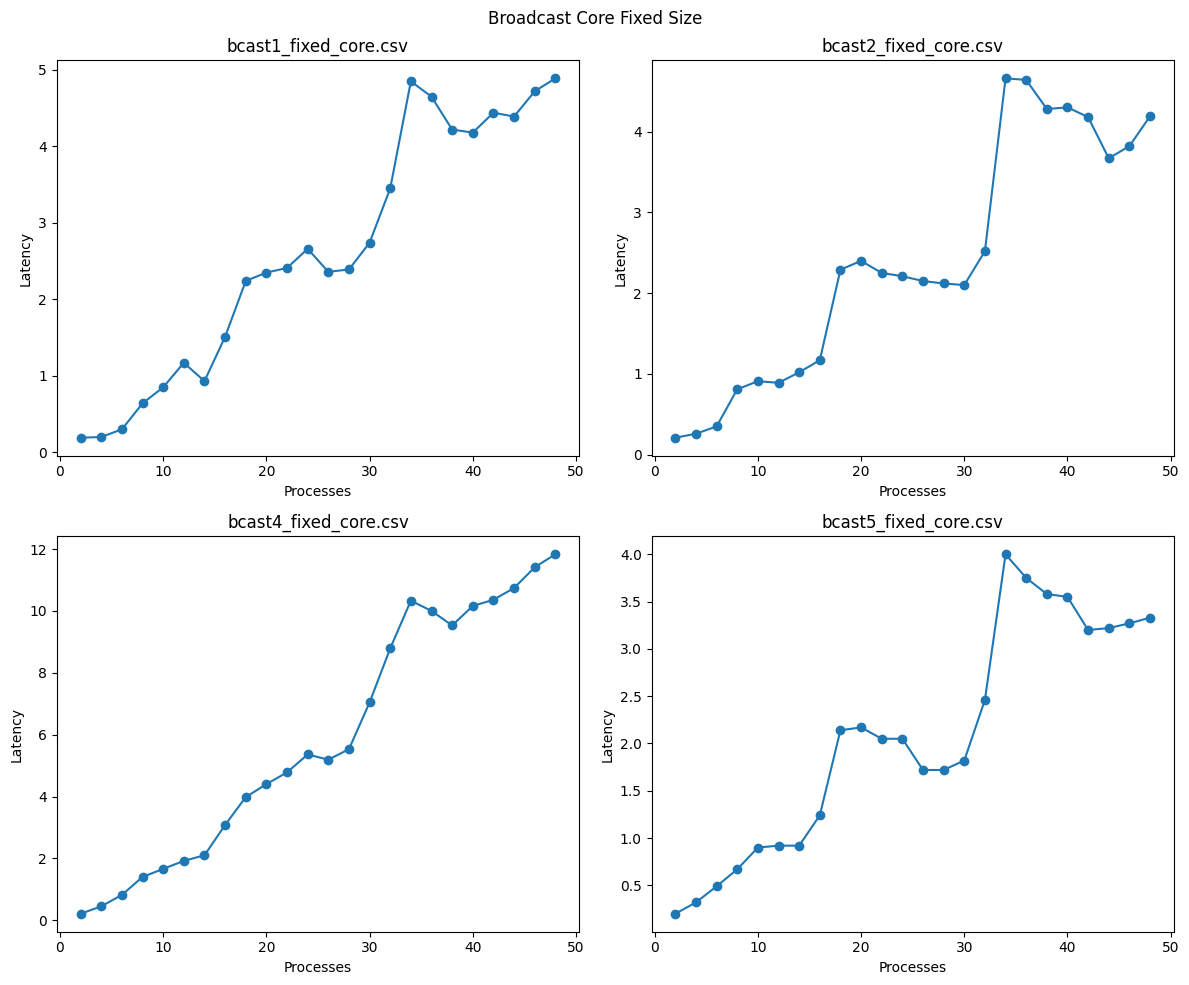

In [40]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv",
]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Broadcast Core Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


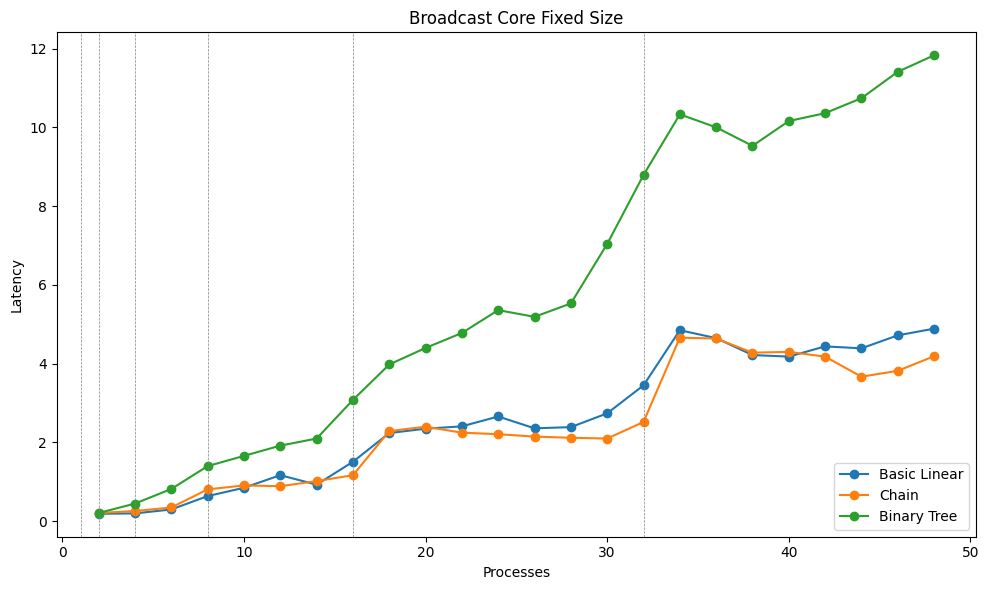

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_core.csv",
    #"/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

# Aggiungi linee tratteggiate verticali per le potenze di 2 dei processi
max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Basic Linear', 'Chain', 'Binary Tree'])
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Core Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


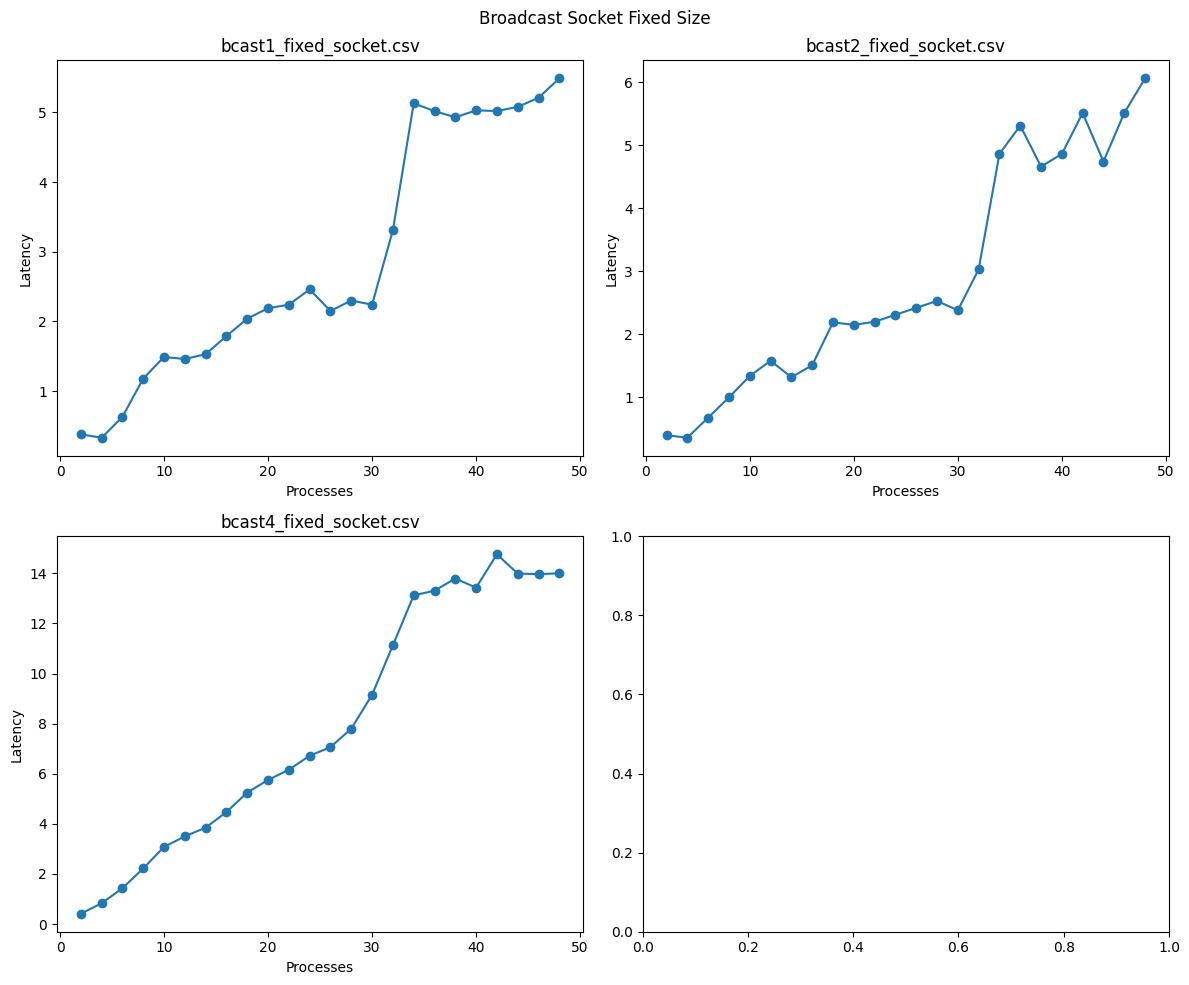

In [43]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_socket.csv",
    #"/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_socket.csv",
]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Broadcast Socket Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


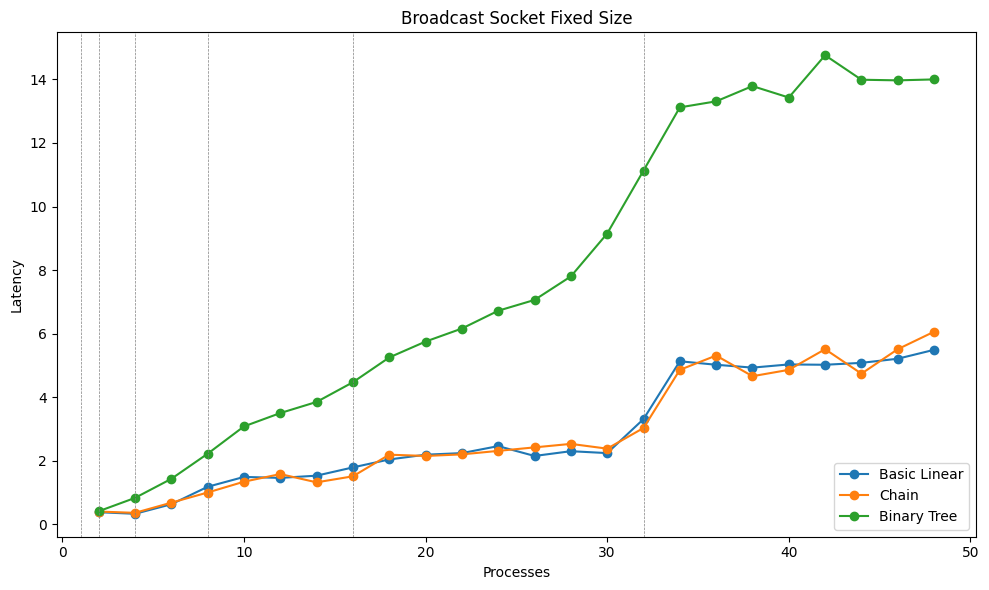

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_socket.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Basic Linear', 'Chain', 'Binary Tree'])
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Socket Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


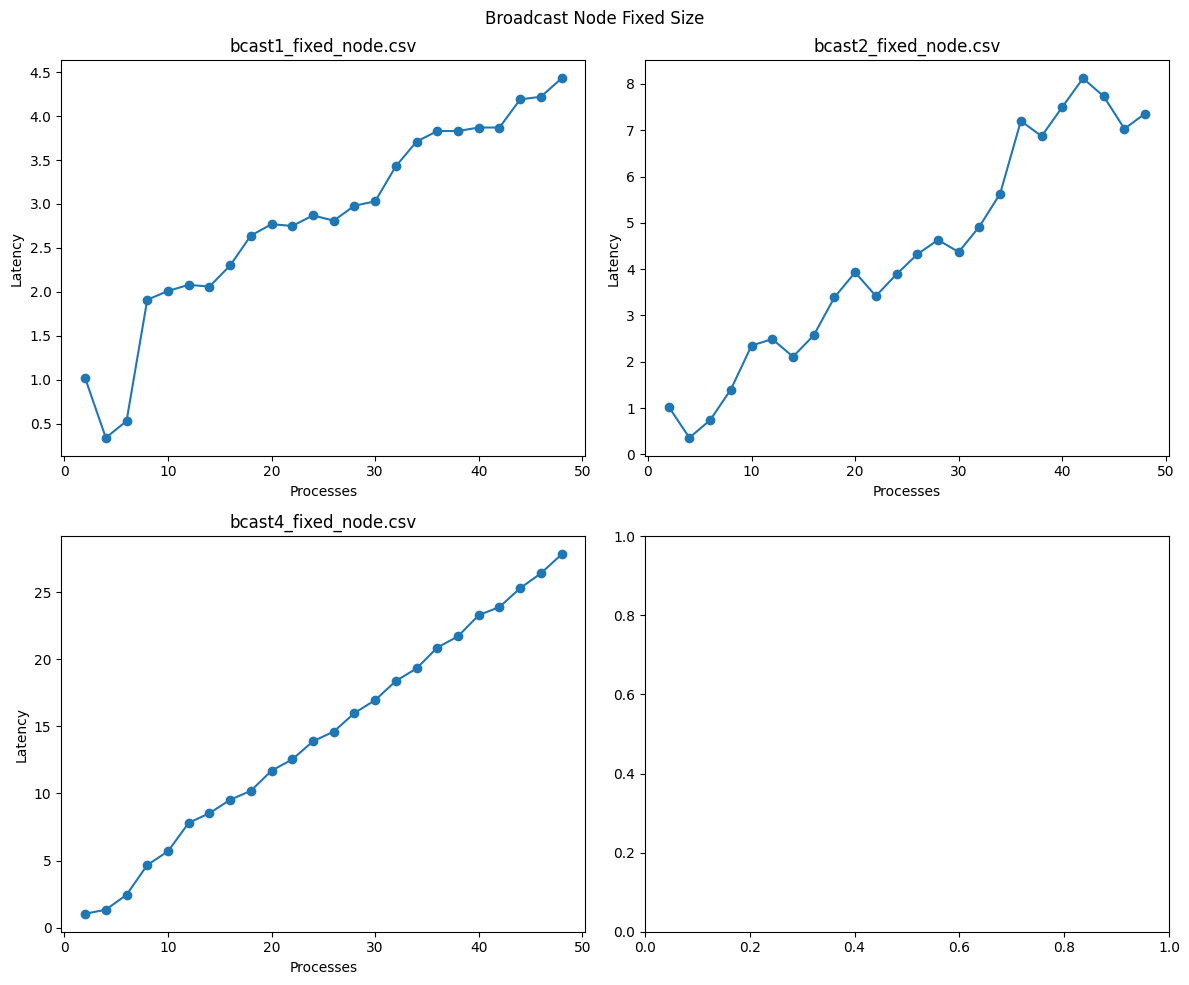

In [45]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_node.csv",
    #"/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_node.csv",
]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Broadcast Node Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


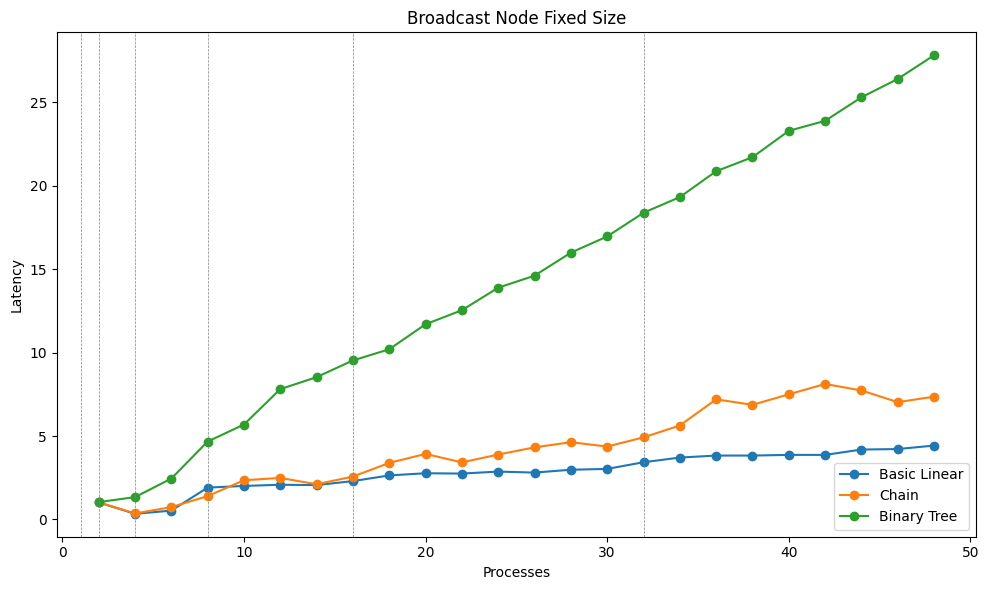

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_node.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Basic Linear', 'Chain', 'Binary Tree'])
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Node Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


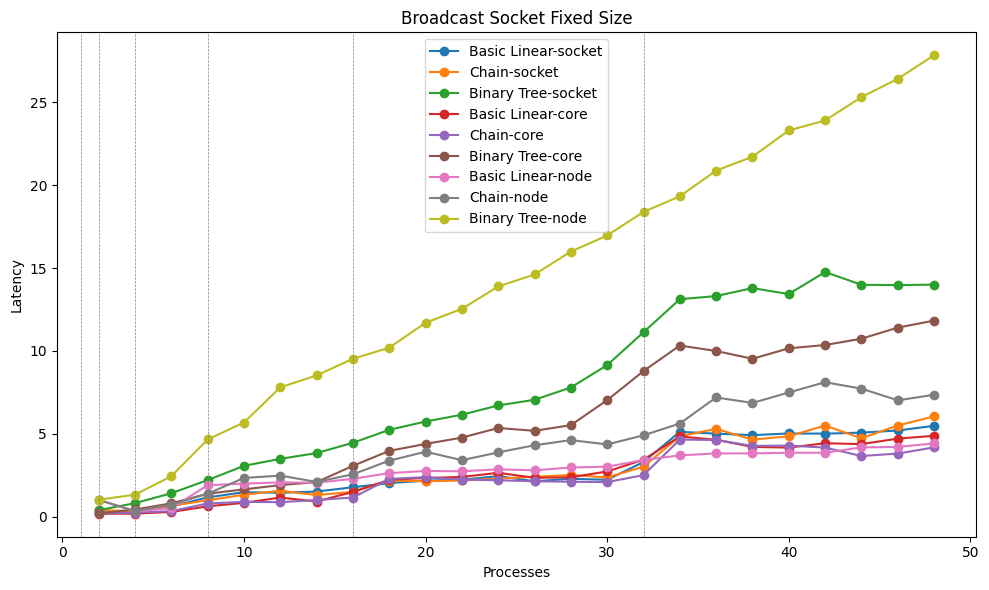

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_socket.csv",

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_core.csv",
  

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_node.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Basic Linear-socket', 'Chain-socket', 'Binary Tree-socket','Basic Linear-core', 'Chain-core', 'Binary Tree-core','Basic Linear-node', 'Chain-node', 'Binary Tree-node'])
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Socket Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


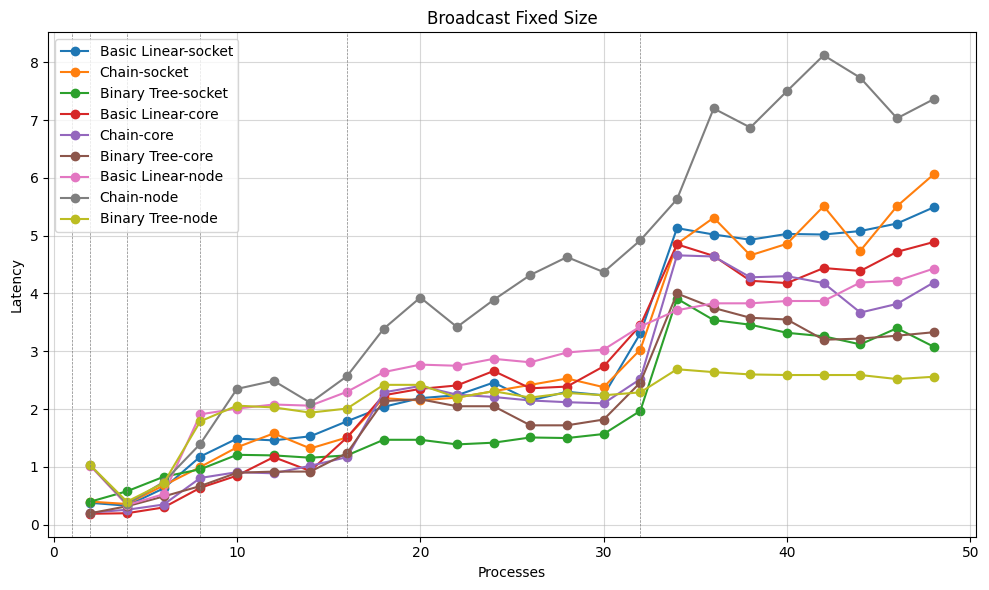

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_socket.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_socket.csv",

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv",
  

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_node.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_node.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Basic Linear-socket', 'Chain-socket', 'Binary Tree-socket',
           'Basic Linear-core', 'Chain-core', 'Binary Tree-core',
           'Basic Linear-node', 'Chain-node', 'Binary Tree-node'], loc='upper left')

ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Broadcast Fixed Size')

# Aggiungi griglia chiara
ax.grid(alpha=0.5)

# Mostra il grafico
plt.tight_layout()
plt.show()


## SCATTER FIXED SIZE

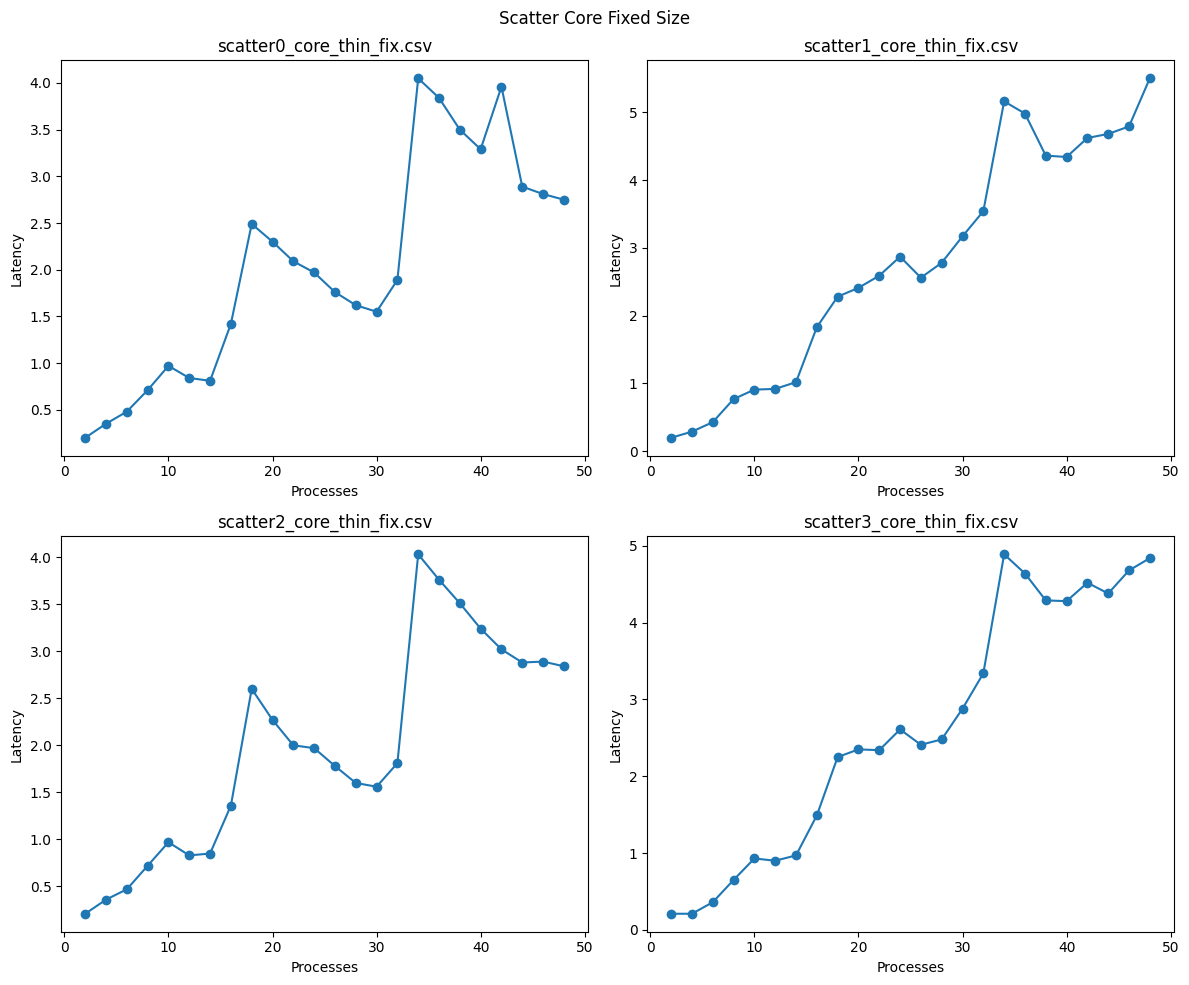

In [110]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Scatter Core Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


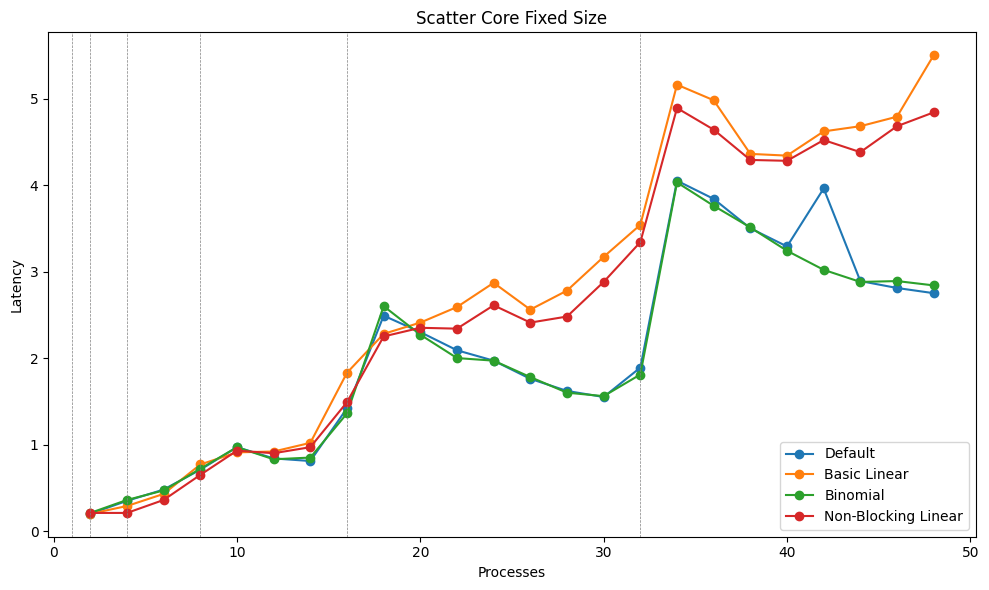

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Default','Basic Linear','Binomial','Non-Blocking Linear'])
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Core Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


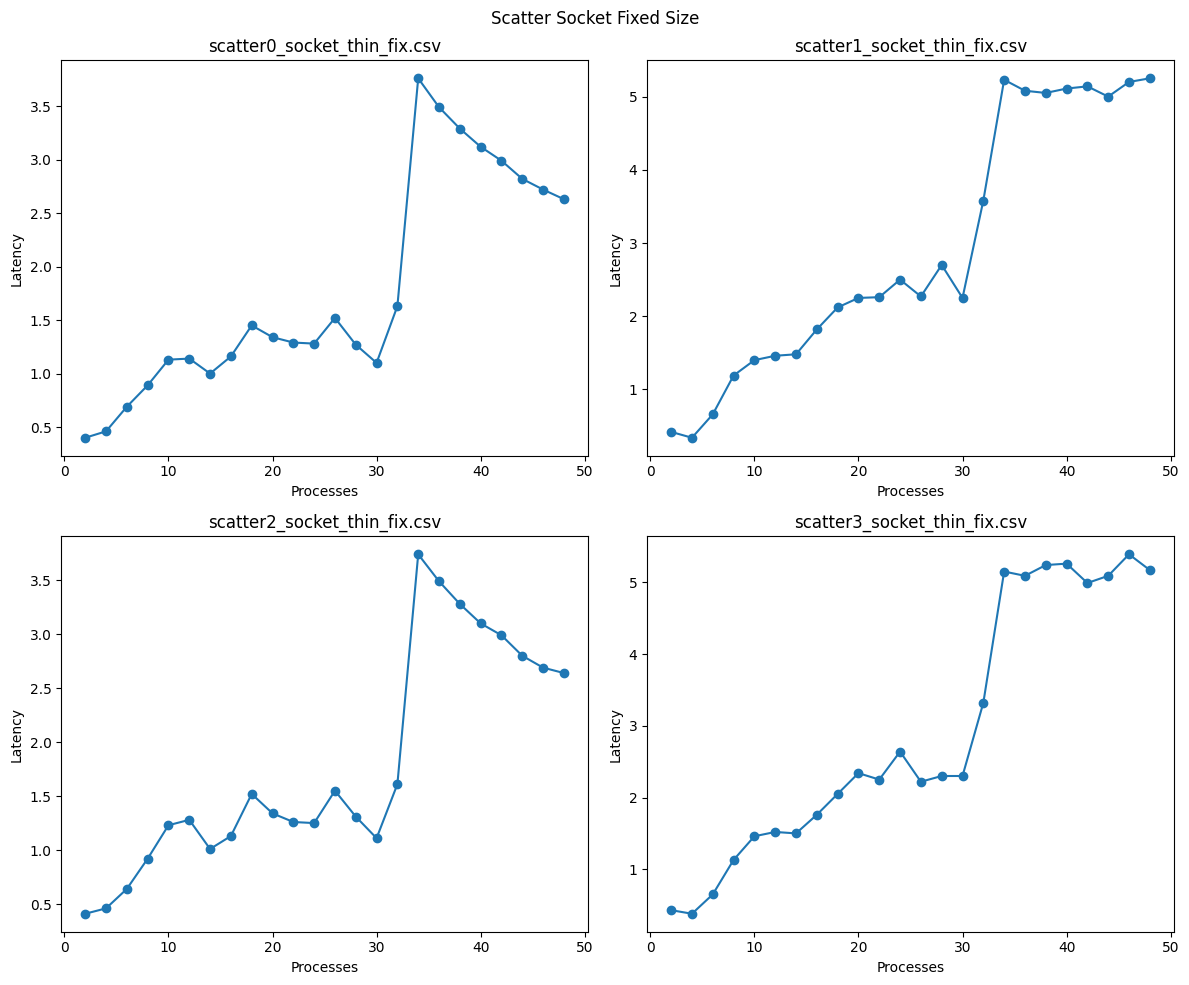

In [47]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin_fix.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Scatter Socket Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


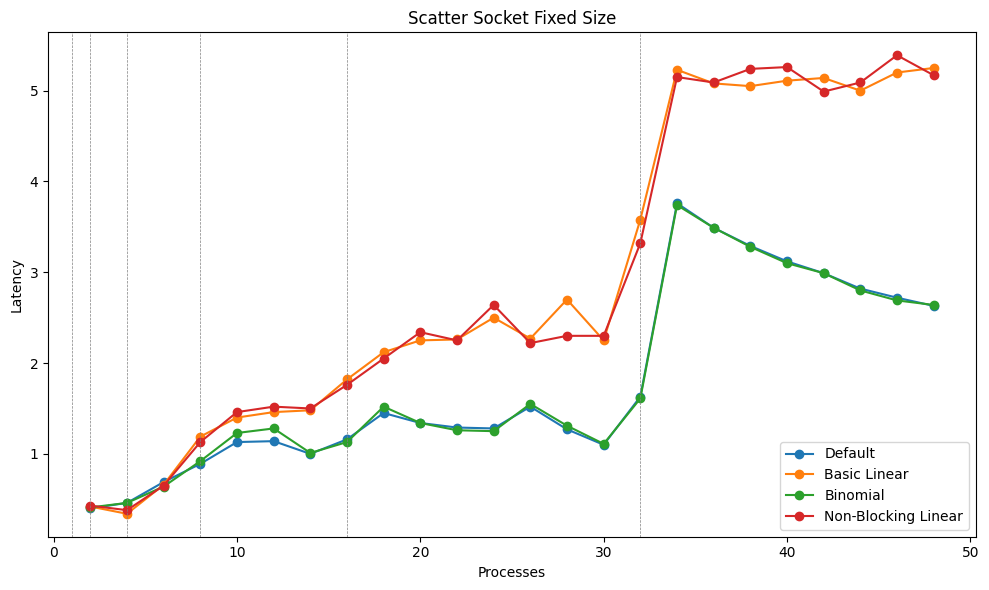

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin_fix.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Default','Basic Linear','Binomial','Non-Blocking Linear'])
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Socket Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


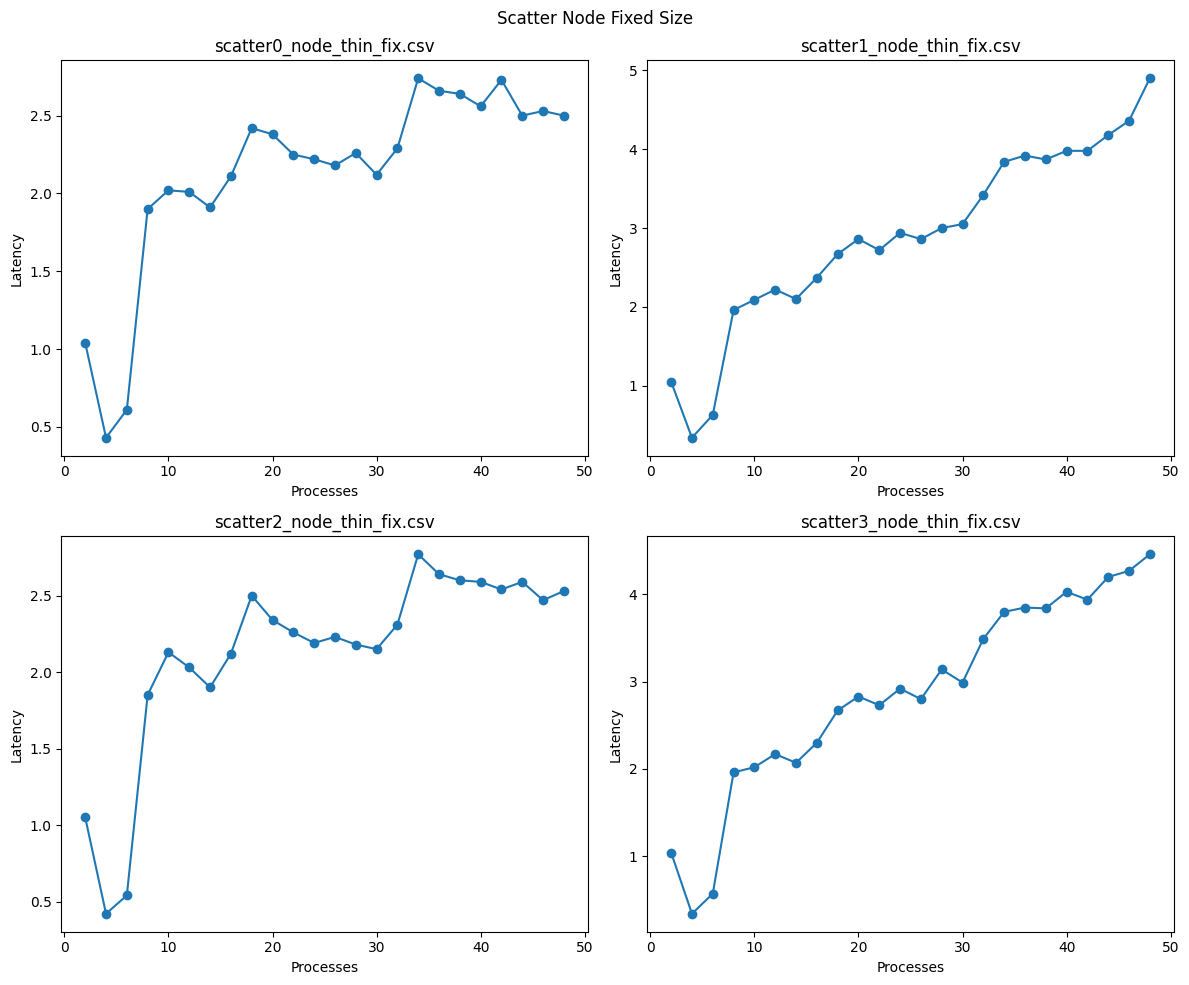

In [48]:
# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin_fix.csv",

]

# Crea la figura e i subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotta i dati per ogni file CSV in ogni subplot
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Ottieni gli indici di riga e colonna per il subplot corrente
    row_index = i // 2
    col_index = i % 2
    
    # Plotta i dati nel subplot corrispondente
    axs[row_index, col_index].plot(x, y, marker='o', linestyle='-')
    axs[row_index, col_index].set_xlabel('Processes')
    axs[row_index, col_index].set_ylabel('Latency')
    axs[row_index, col_index].set_title(file_path.split("/")[-1])

# Aggiungi il titolo globale alla figura
fig.suptitle('Scatter Node Fixed Size')

# Mostra la figura
plt.tight_layout()
plt.show()


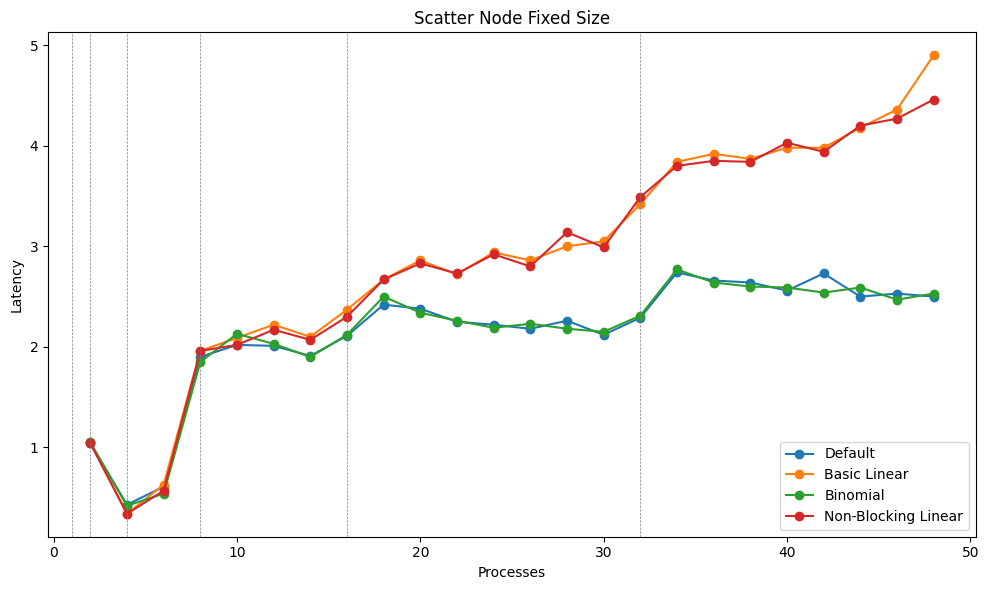

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
     "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin_fix.csv",
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Default','Basic Linear','Binomial','Non-Blocking Linear'])
ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Node Fixed Size')

# Mostra il grafico
plt.tight_layout()
plt.show()


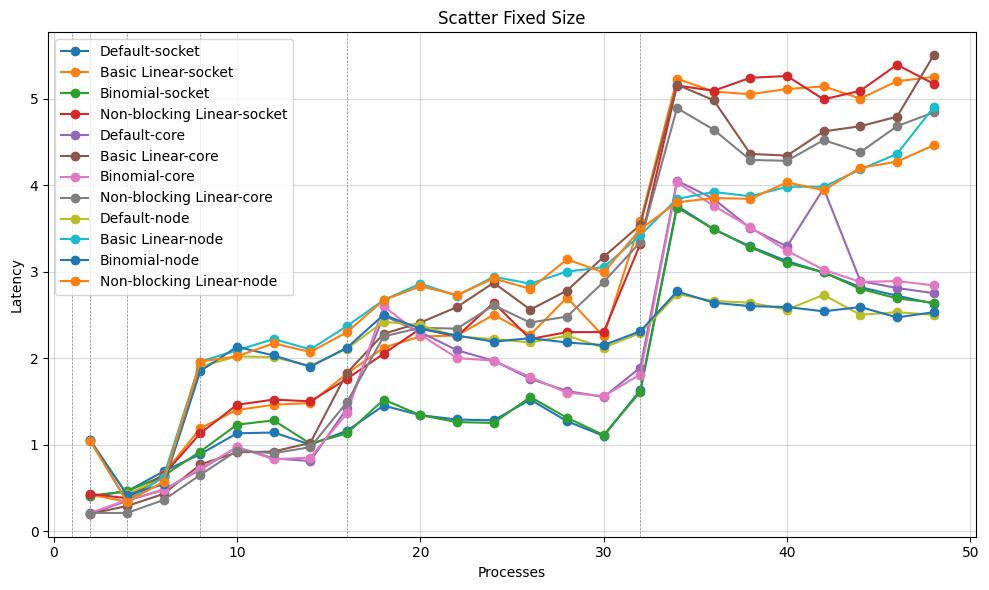

In [136]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV
file_paths = [
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin_fix.csv",

    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv",
  

    
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin_fix.csv",
    "/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin_fix.csv"
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, file_path in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Default-socket','Basic Linear-socket', 'Binomial-socket', 'Non-blocking Linear-socket',
           'Default-core','Basic Linear-core', 'Binomial-core', 'Non-blocking Linear-core',
           'Default-node','Basic Linear-node', 'Binomial-node', 'Non-blocking Linear-node'], loc='upper left')

ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Fixed Size')

# Aggiungi griglia chiara
ax.grid(alpha=0.5)

# Mostra il grafico
plt.tight_layout()
plt.show()


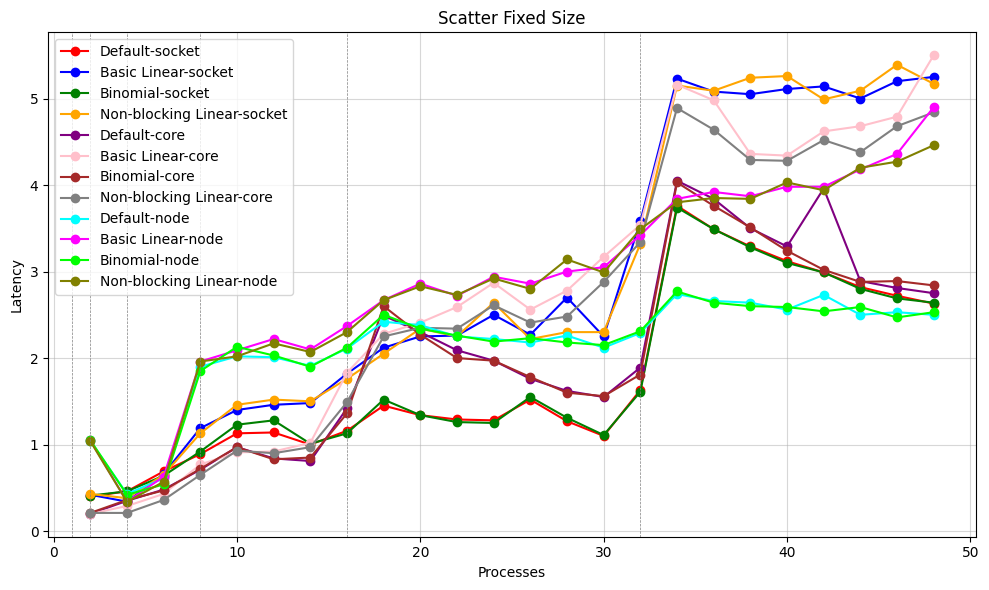

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista dei percorsi dei file CSV e corrispondenti colori
file_paths = [
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv", 'red'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_socket_thin_fix.csv", 'blue'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_socket_thin_fix.csv", 'green'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_socket_thin_fix.csv", 'orange'),

    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv", 'purple'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv", 'pink'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv", 'brown'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv", 'gray'),

    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv", 'cyan'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_node_thin_fix.csv", 'magenta'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_node_thin_fix.csv", 'lime'),
    ("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_node_thin_fix.csv", 'olive')
]

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(10, 6))

# Plotta i dati per ogni file CSV
for i, (file_path, color) in enumerate(file_paths):
    # Leggi i dati dal file CSV
    data = pd.read_csv(file_path)
    
    # Estrai le colonne
    x = data["Processes"]
    y = data["Latency"]
    
    # Plotta i dati
    ax.plot(x, y, marker='o', linestyle='-', color=color, label=f"File {i+1}")

max_processes = max(data["Processes"])  # Determina il massimo numero di processi tra tutti i file
power_of_2 = 1
while power_of_2 <= max_processes:
    ax.axvline(x=power_of_2, color='gray', linestyle='--', linewidth=0.5)
    power_of_2 *= 2

# Aggiungi legenda e titolo
ax.legend(['Default-socket','Basic Linear-socket', 'Binomial-socket', 'Non-blocking Linear-socket',
           'Default-core','Basic Linear-core', 'Binomial-core', 'Non-blocking Linear-core',
           'Default-node','Basic Linear-node', 'Binomial-node', 'Non-blocking Linear-node'], loc='upper left')


ax.set_xlabel('Processes')
ax.set_ylabel('Latency')
ax.set_title('Scatter Fixed Size')

# Aggiungi griglia chiara
ax.grid(alpha=0.5)

# Mostra il grafico
plt.tight_layout()
plt.show()


## MODELLO SCATTER DAFAULT SOCKET

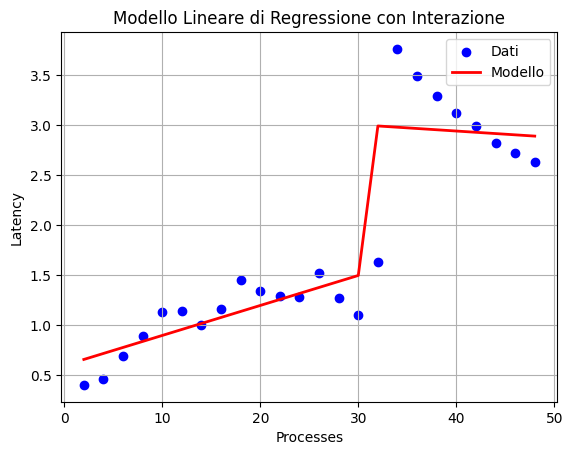

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Calcola il numero di processi maggiori di 30
data['Processes_gt_30'] = (data['Processes'] > 30).astype(int)

# Aggiungi il termine di interazione
data['Interaction'] = data['Processes'] * data['Processes_gt_30']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_30', 'Interaction']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
pip install statsmodels

Python(38014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.5 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 55.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Calcola il numero di processi maggiori di 30
data['Processes_gt_30'] = (data['Processes'] > 30).astype(int)

# Aggiungi il termine di interazione
data['Interaction'] = data['Processes'] * data['Processes_gt_30']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_30', 'Interaction']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     38.49
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.69e-08
Time:                        16:27:07   Log-Likelihood:                -11.161
No. Observations:                  24   AIC:                             30.32
Df Residuals:                      20   BIC:                             35.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5947      0.229     

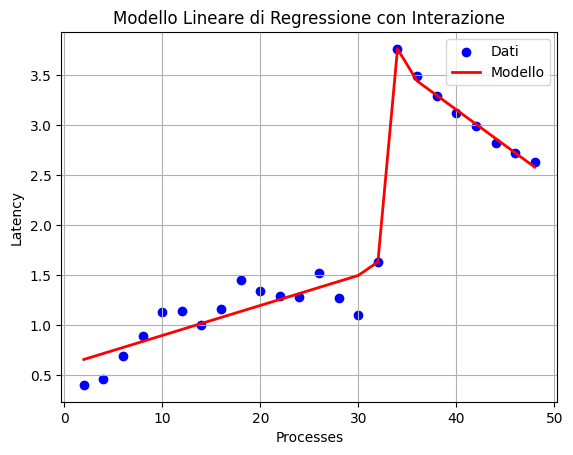

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Crea le covariate per i processi tra 1 e 30, tra 30 e 34 e maggiori di 34
data['Processes_1_30'] = ((data['Processes'] >= 1) & (data['Processes'] <= 30)).astype(int)
data['Processes_30_34'] = ((data['Processes'] > 30) & (data['Processes'] <= 34)).astype(int)
data['Processes_gt_34'] = (data['Processes'] > 34).astype(int)

# Aggiungi le interazioni
data['Interaction_1_30'] = data['Processes_1_30'] * data['Processes']
data['Interaction_30_34'] = data['Processes_30_34'] * data['Processes']
data['Interaction_gt_34'] = data['Processes_gt_34'] * data['Processes']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes_1_30', 'Processes_30_34', 'Processes_gt_34',
          'Interaction_1_30', 'Interaction_30_34', 'Interaction_gt_34']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
import pandas as pd
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_socket_thin_fix.csv")

# Crea le covariate per i processi tra 1 e 30, tra 30 e 34 e maggiori di 34
data['Processes_1_30'] = ((data['Processes'] >= 1) & (data['Processes'] <= 30)).astype(int)
data['Processes_30_34'] = ((data['Processes'] > 30) & (data['Processes'] <= 34)).astype(int)
data['Processes_gt_34'] = (data['Processes'] > 34).astype(int)

# Aggiungi le interazioni
data['Interaction_1_30'] = data['Processes_1_30'] * data['Processes']
data['Interaction_30_34'] = data['Processes_30_34'] * data['Processes']
data['Interaction_gt_34'] = data['Processes_gt_34'] * data['Processes']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes_1_30', 'Processes_30_34', 'Processes_gt_34',
          'Interaction_1_30', 'Interaction_30_34', 'Interaction_gt_34']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           5.73e-14
Time:                        16:31:51   Log-Likelihood:                 10.767
No. Observations:                  24   AIC:                            -9.533
Df Residuals:                      18   BIC:                            -2.465
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.4579      1.05

## MODELLO SCATTER DEFAULT NODE

                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     34.58
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           6.45e-06
Time:                        16:38:53   Log-Likelihood:                -10.435
No. Observations:                  24   AIC:                             24.87
Df Residuals:                      22   BIC:                             27.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2793      0.164      7.777      0.0

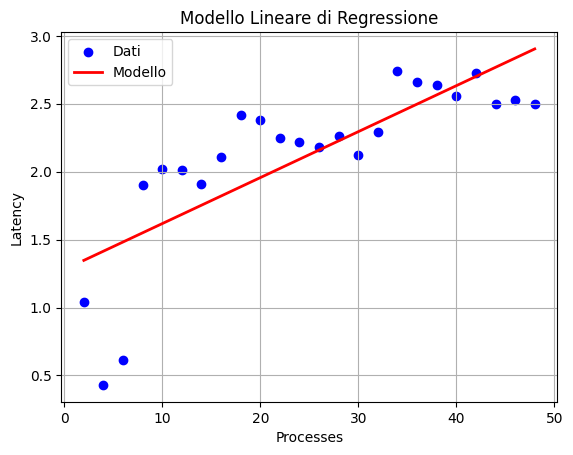

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Processes']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione')
plt.legend()
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     35.41
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           3.42e-08
Time:                        16:44:02   Log-Likelihood:                0.33747
No. Observations:                  24   AIC:                             7.325
Df Residuals:                      20   BIC:                             12.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3050      0.320      0.

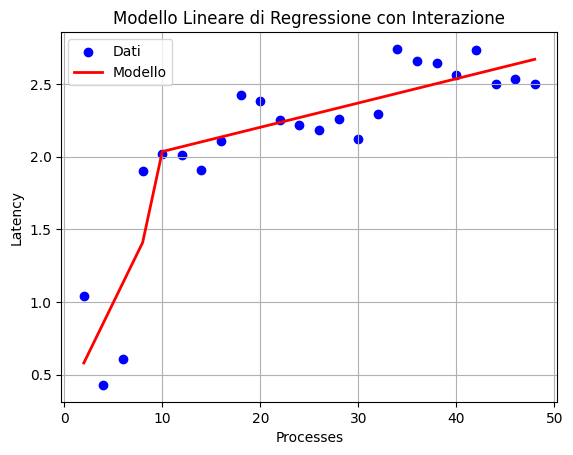

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_node_thin_fix.csv")

# Calcola la covariata per i processi maggiori di 8
data['Processes_gt_8'] = (data['Processes'] > 8).astype(int)

# Calcola la covariata di interazione tra processi e processi maggiori di 8
data['Interaction'] = data['Processes'] * data['Processes_gt_8']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_8', 'Interaction']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


## MODELLO BCAST 1 NODE

                            OLS Regression Results                            
Dep. Variable:                Latency   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.58e-13
Time:                        16:47:31   Log-Likelihood:                -6.2628
No. Observations:                  24   AIC:                             16.53
Df Residuals:                      22   BIC:                             18.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8930      0.138      6.460      0.0

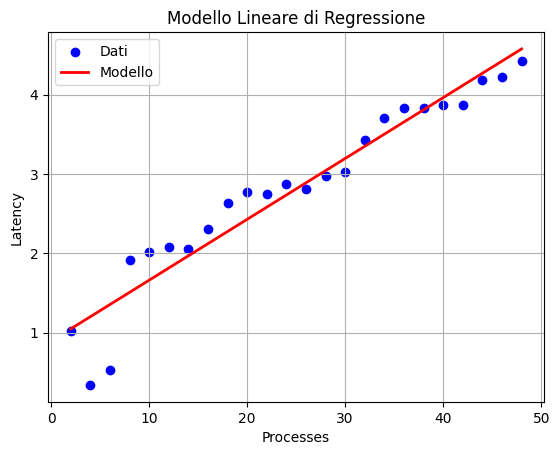

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_node.csv")

# Seleziona le covariate e la variabile dipendente
X = data[['Processes']]
y = data['Latency']

# Aggiungi una costante al modello
X = sm.add_constant(X)

# Crea il modello di regressione lineare
model = sm.OLS(y, X)

# Adatta il modello ai dati
results = model.fit()

# Stampa un sommario del modello
print(results.summary())

# Predici i valori della latenza utilizzando il modello
y_pred = results.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione')
plt.legend()
plt.grid(True)
plt.show()


## MODELLO BCAST 1 SOCKET

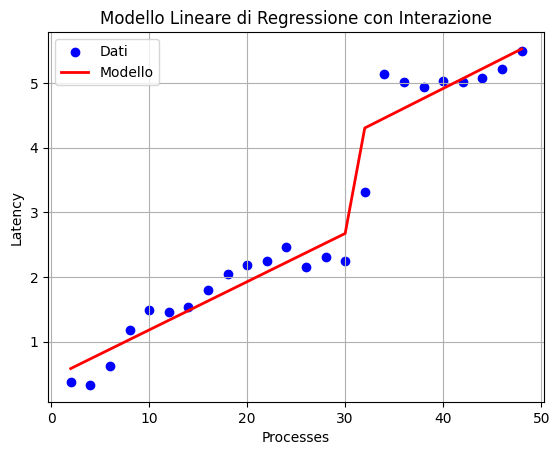

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv")

# Calcola il numero di processi maggiori di 30
data['Processes_gt_30'] = (data['Processes'] > 30).astype(int)

# Aggiungi il termine di interazione
data['Interaction'] = data['Processes'] * data['Processes_gt_30']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes', 'Processes_gt_30', 'Interaction']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


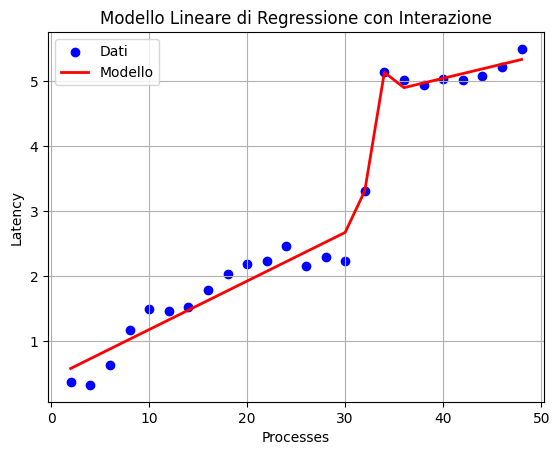

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_socket.csv")

# Crea le covariate per i processi tra 1 e 30, tra 30 e 34 e maggiori di 34
data['Processes_1_30'] = ((data['Processes'] >= 1) & (data['Processes'] <= 30)).astype(int)
data['Processes_30_34'] = ((data['Processes'] > 30) & (data['Processes'] <= 34)).astype(int)
data['Processes_gt_34'] = (data['Processes'] > 34).astype(int)

# Aggiungi le interazioni
data['Interaction_1_30'] = data['Processes_1_30'] * data['Processes']
data['Interaction_30_34'] = data['Processes_30_34'] * data['Processes']
data['Interaction_gt_34'] = data['Processes_gt_34'] * data['Processes']

# Seleziona le covariate e la variabile dipendente
X = data[['Processes_1_30', 'Processes_30_34', 'Processes_gt_34',
          'Interaction_1_30', 'Interaction_30_34', 'Interaction_gt_34']]
y = data['Latency']

# Crea il modello di regressione lineare
model = LinearRegression()

# Adatta il modello ai dati
model.fit(X, y)

# Predici i valori della latenza utilizzando il modello
y_pred = model.predict(X)

# Plotta i dati e il modello
plt.scatter(data['Processes'], y, color='blue', label='Dati')
plt.plot(data['Processes'], y_pred, color='red', linewidth=2, label='Modello')
plt.xlabel('Processes')
plt.ylabel('Latency')
plt.title('Modello Lineare di Regressione con Interazione')
plt.legend()
plt.grid(True)
plt.show()


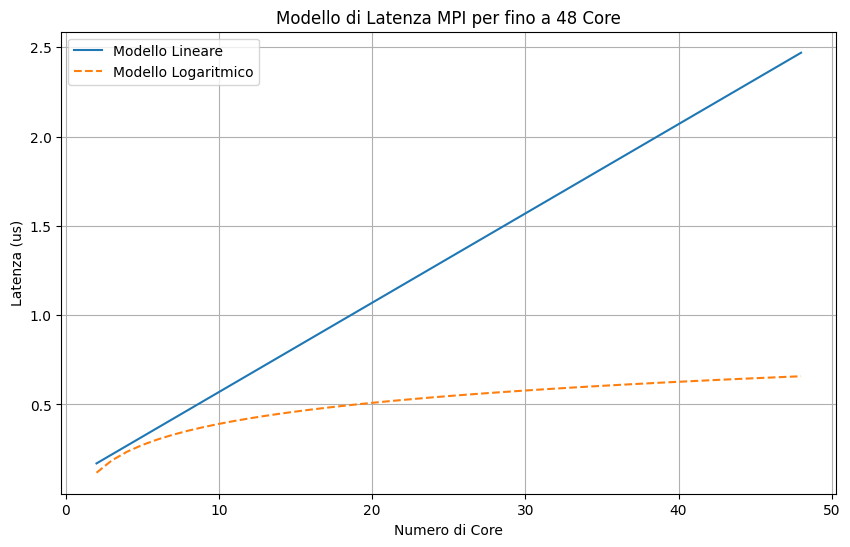

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Dati ipotetici
L_2 = 0.17  # Latenza per due core in microsecondi
k = 0.05    # Incremento di latenza per core aggiunto

# Numero di core
cores = np.arange(2, 49)  # da 2 a 48 core

# Modello lineare
linear_latency = L_2 + (cores - 2) * k

# Modello logaritmico
log_latency = L_2 * np.log(cores)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cores, linear_latency, label='Modello Lineare')
plt.plot(cores, log_latency, label='Modello Logaritmico', linestyle='--')
plt.xlabel('Numero di Core')
plt.ylabel('Latenza (us)')
plt.title('Modello di Latenza MPI per fino a 48 Core')
plt.legend()
plt.grid(True)
plt.show()

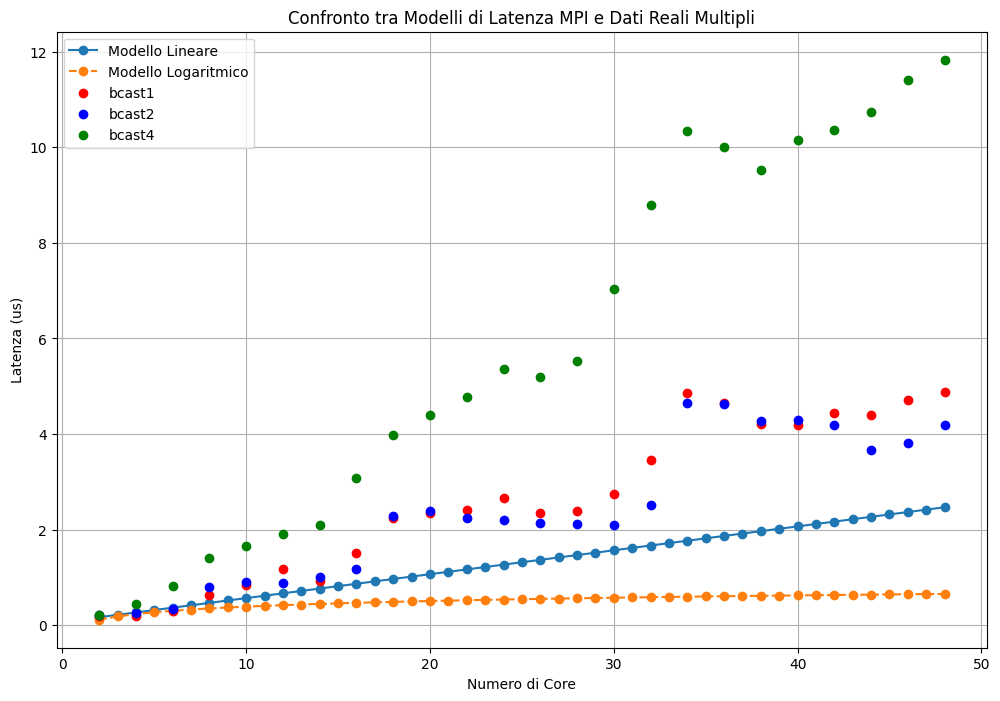

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lettura dati reali da CSV per il primo dataset
data1 = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv")
real_cores1 = data1['Processes']
real_latency1 = data1['Latency']

# Lettura dati reali dal secondo dataset
data2 = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv")
real_cores2 = data2['Processes']
real_latency2 = data2['Latency']

# Lettura dati reali dal terzo dataset
data3 = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast4_fixed_core.csv")
real_cores3 = data3['Processes']
real_latency3 = data3['Latency']

# Dati ipotetici per i modelli
L_2 = 0.17  # Latenza per due core in microsecondi
k = 0.05    # Incremento di latenza per core aggiunto

# Numero di core per i modelli
cores = np.arange(2, 49)  # da 2 a 48 core

# Modello lineare
linear_latency = L_2 + (cores - 2) * k

# Modello logaritmico
log_latency = L_2 * np.log(cores)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(cores, linear_latency, label='Modello Lineare', linestyle='-', marker='o')
plt.plot(cores, log_latency, label='Modello Logaritmico', linestyle='--', marker='o')
plt.scatter(real_cores1, real_latency1, color='red', label='bcast1', zorder=5)
plt.scatter(real_cores2, real_latency2, color='blue', label='bcast2', zorder=5)
plt.scatter(real_cores3, real_latency3, color='green', label='bcast4', zorder=5)

plt.xlabel('Numero di Core')
plt.ylabel('Latenza (us)')
plt.title('Confronto tra Modelli di Latenza MPI e Dati Reali Multipli')
plt.legend()
plt.grid(True)
plt.show()

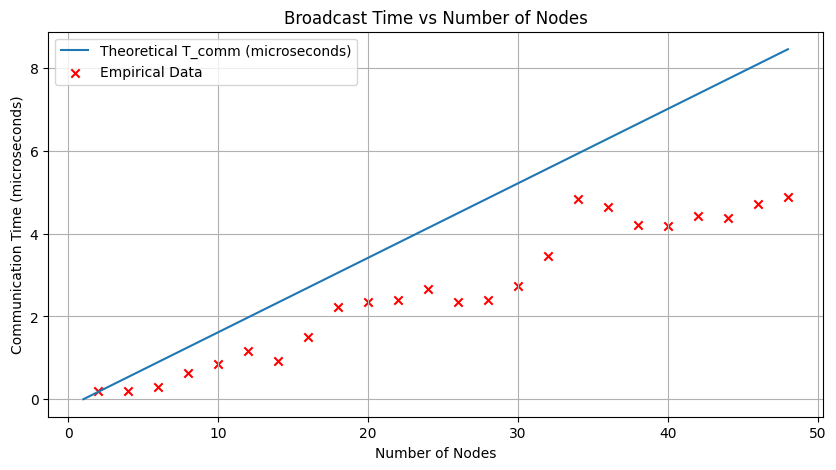

In [198]:
#BASIC LINEAR

import matplotlib.pyplot as plt
import numpy as np

# Parameters
lambda_ = 0.18e-6  # message pt2pt
n_nodes = np.arange(1, 49)  # number of nodes from 1 to 48

# Compute T_comm
T_comm = lambda_*(n_nodes-1)

# Load empirical data from a CSV file
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv")  # replace 'path_to_your_file.csv' with the actual path to your CSV file

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(n_nodes, T_comm * 1e6, label='Theoretical T_comm (microseconds)')
plt.scatter(data['Processes'], data['Latency'], color='red', label='Empirical Data', marker='x')  # Plot empirical data
plt.xlabel('Number of Nodes')
plt.ylabel('Communication Time (microseconds)')
plt.title('Broadcast Time vs Number of Nodes')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sat, 04 May 2024   Prob (F-statistic):           9.76e-14
Time:                        17:00:26   Log-Likelihood:                -11.122
No. Observations:                  24   AIC:                             28.24
Df Residuals:                      21   BIC:                             31.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3867      0.274     -1.409      0.1

In [202]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast1_fixed_core.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Applica il logaritmo alla variabile dipendente
log_latency = np.log(latency)

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(log_latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     245.3
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.75e-15
Time:                        17:02:39   Log-Likelihood:                 4.6091
No. Observations:                  24   AIC:                            -3.218
Df Residuals:                      21   BIC:                            0.3160
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9058      0.142    -13.381      0.0

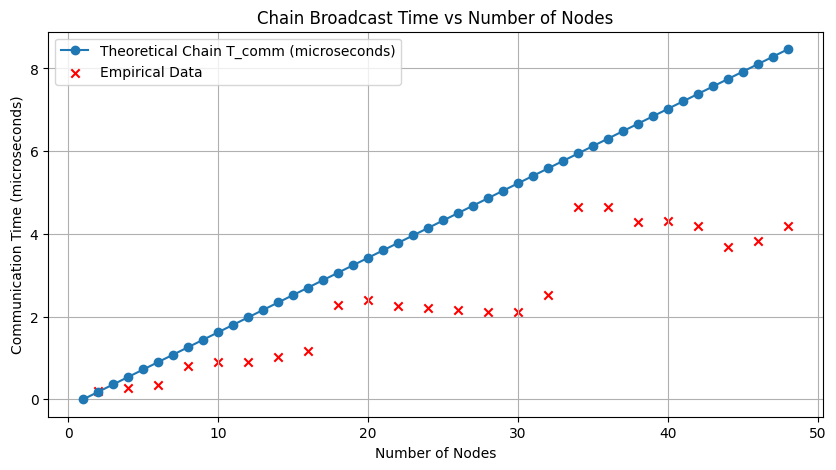

In [164]:
#CHAIN 

import matplotlib.pyplot as plt
import numpy as np

# Parameters
lambda_ = 0.18e-6  # example latency in seconds
b_network = 100e9*0.8  # bandwidth in bits per second (100 Gbit/s for Infiniband)
message_size = 1  # size of the message in bytes
n_nodes = np.arange(1, 49)  # number of nodes from 1 to 48

# Compute T_comm for Chain Broadcast Algorithm
T_comm = (n_nodes - 1) * (lambda_ + (message_size * 8 / b_network))

data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv")  # replace 'path_to_your_file.csv' with the actual path to your CSV file

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(n_nodes, T_comm * 1e6, label='Theoretical Chain T_comm (microseconds)', marker='o')
plt.xlabel('Number of Nodes')
plt.ylabel('Communication Time (microseconds)')
plt.scatter(data['Processes'], data['Latency'], color='red', label='Empirical Data', marker='x')  # Plot empirical data
plt.title('Chain Broadcast Time vs Number of Nodes')
plt.legend()
plt.grid(True)
plt.show()

In [201]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     68.17
Date:                Sat, 04 May 2024   Prob (F-statistic):           6.55e-10
Time:                        17:01:08   Log-Likelihood:                -19.076
No. Observations:                  24   AIC:                             44.15
Df Residuals:                      21   BIC:                             47.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3062      0.382     -0.801      0.4

In [203]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast2_fixed_core.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Applica il logaritmo alla variabile dipendente
log_latency = np.log(latency)

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(log_latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.85e-13
Time:                        17:03:49   Log-Likelihood:                 2.0196
No. Observations:                  24   AIC:                             1.961
Df Residuals:                      21   BIC:                             5.495
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6790      0.159    -10.582      0.0

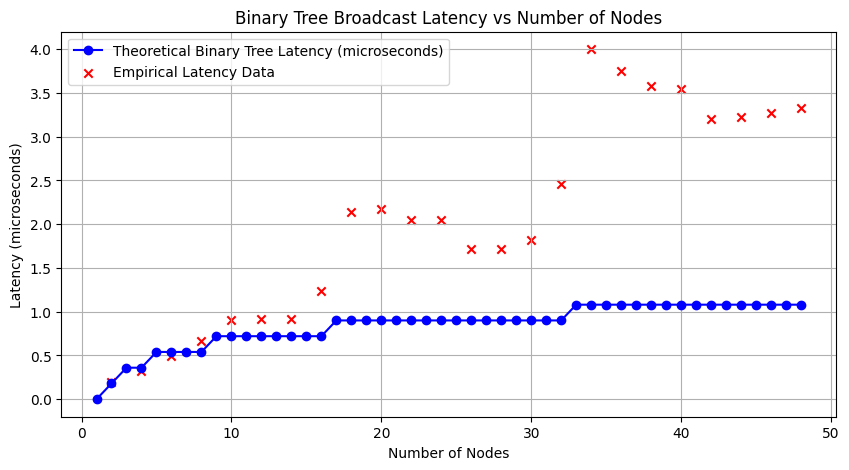

In [165]:
#BINARY TREE

import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd  # Import pandas to handle CSV data

# Parameters for theoretical model
lambda_ = 0.18e-6  # latency in seconds for a 1-byte message
b_network = 100e9  # bandwidth in bits per second (100 Gbit/s for Infiniband)
message_size = 1  # size of the message in bytes
n_nodes = np.arange(1, 49)  # adjust the range as necessary for your data

# Calculate the height of the tree for theoretical model
h = np.ceil(np.log2(n_nodes))
# Calculate total communication time for Binary Tree Broadcast Algorithm
T_comm = (h) * (lambda_ + (message_size*8  / b_network))

# Load empirical data from CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv")  # replace 'path_to_your_file.csv' with the actual path to your CSV file

# Filtering data to match the plot range if necessary
data_filtered = data[data['Processes'].isin(n_nodes)]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(n_nodes, T_comm * 1e6, 'bo-', label='Theoretical Binary Tree Latency (microseconds)')
plt.scatter(data_filtered['Processes'], data_filtered['Latency'], color='red', label='Empirical Latency Data', marker='x')
plt.xlabel('Number of Nodes')
plt.ylabel('Latency (microseconds)')
plt.title('Binary Tree Broadcast Latency vs Number of Nodes')
plt.legend()
plt.grid(True)
plt.show()

In [205]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     64.89
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.02e-09
Time:                        17:14:09   Log-Likelihood:                -14.161
No. Observations:                  24   AIC:                             34.32
Df Residuals:                      21   BIC:                             37.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1865      0.311     -0.599      0.5

In [204]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/bcast5_fixed_core.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Applica il logaritmo alla variabile dipendente
log_latency = np.log(latency)

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(log_latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sat, 04 May 2024   Prob (F-statistic):           5.85e-13
Time:                        17:06:08   Log-Likelihood:                 3.4171
No. Observations:                  24   AIC:                           -0.8342
Df Residuals:                      21   BIC:                             2.700
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5367      0.150    -10.266      0.0

## SCATTER

In [209]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     31.71
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.52e-07
Time:                        17:34:38   Log-Likelihood:                -20.883
No. Observations:                  24   AIC:                             47.77
Df Residuals:                      21   BIC:                             51.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2165      0.412     -0.525      0.6

In [210]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter0_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Applica il logaritmo alla variabile dipendente
log_latency = np.log(latency)

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(log_latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     79.13
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.67e-10
Time:                        17:35:11   Log-Likelihood:                -2.6090
No. Observations:                  24   AIC:                             11.22
Df Residuals:                      21   BIC:                             14.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5059      0.192     -7.827      0.0

In [211]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.58e-14
Time:                        17:36:07   Log-Likelihood:                -11.529
No. Observations:                  24   AIC:                             29.06
Df Residuals:                      21   BIC:                             32.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3809      0.279     -1.365      0.1

In [212]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter1_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Applica il logaritmo alla variabile dipendente
log_latency = np.log(latency)

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(log_latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     338.0
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.07e-16
Time:                        17:36:07   Log-Likelihood:                 9.5266
No. Observations:                  24   AIC:                            -13.05
Df Residuals:                      21   BIC:                            -9.519
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6872      0.116    -14.540      0.0

In [213]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     32.44
Date:                Sat, 04 May 2024   Prob (F-statistic):           3.78e-07
Time:                        17:36:07   Log-Likelihood:                -19.525
No. Observations:                  24   AIC:                             45.05
Df Residuals:                      21   BIC:                             48.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1836      0.389     -0.472      0.6

In [214]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter2_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Applica il logaritmo alla variabile dipendente
log_latency = np.log(latency)

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(log_latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     78.62
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.77e-10
Time:                        17:36:08   Log-Likelihood:                -2.0875
No. Observations:                  24   AIC:                             10.17
Df Residuals:                      21   BIC:                             13.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4696      0.188     -7.805      0.0

In [215]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sat, 04 May 2024   Prob (F-statistic):           6.91e-14
Time:                        17:36:08   Log-Likelihood:                -10.815
No. Observations:                  24   AIC:                             27.63
Df Residuals:                      21   BIC:                             31.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3966      0.271     -1.464      0.1

In [216]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Carica i dati dal file CSV
data = pd.read_csv("/Users/edoardozappia/Documents/GitHub/HPC_ex/HPC_ex1/osu-micro-benchmarks-7.3/c/mpi/collective/blocking/scatter3_core_thin_fix.csv")

# Estrai le colonne Processes e Latency
processes = data['Processes'].values.reshape(-1, 1)  # Rendi la forma (n, 1) per il fitting
latency = data['Latency'].values

# Applica il logaritmo alla variabile dipendente
log_latency = np.log(latency)

# Crea un oggetto per le feature polinomiali di grado 2
poly_features = PolynomialFeatures(degree=2)
processes_poly = poly_features.fit_transform(processes)

# Aggiungi una colonna di 1s per il termine di intercetta
processes_poly = sm.add_constant(processes_poly)

# Crea un modello di regressione lineare
model = sm.OLS(log_latency, processes_poly)

# Addestra il modello sui dati
results = model.fit()

# Stampa il summary del modello
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     306.9
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.85e-16
Time:                        17:36:08   Log-Likelihood:                 7.7952
No. Observations:                  24   AIC:                            -9.590
Df Residuals:                      21   BIC:                            -6.056
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8227      0.125    -14.613      0.0